In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
path="/content/drive/MyDrive/Rose.csv"

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.tools.eval_measures as      em
from   sklearn.metrics import  mean_squared_error
from   statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from   IPython.display import display
from   pylab import rcParams

In [4]:
df=pd.read_csv(path)

In [5]:
df.head()

YearMonth   Rose
0   1980-01  112.0
1   1980-02  118.0
2   1980-03  129.0
3   1980-04   99.0
4   1980-05  116.0

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   YearMonth  187 non-null    object 
 1   Rose       185 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.0+ KB


In [7]:
df.dtypes

YearMonth     object
Rose         float64
dtype: object

In [16]:
#We are providing inputs to tell pandas that we are trying to work with time series.
df=pd.read_csv(path , parse_dates = ['YearMonth'] , index_col='YearMonth' )

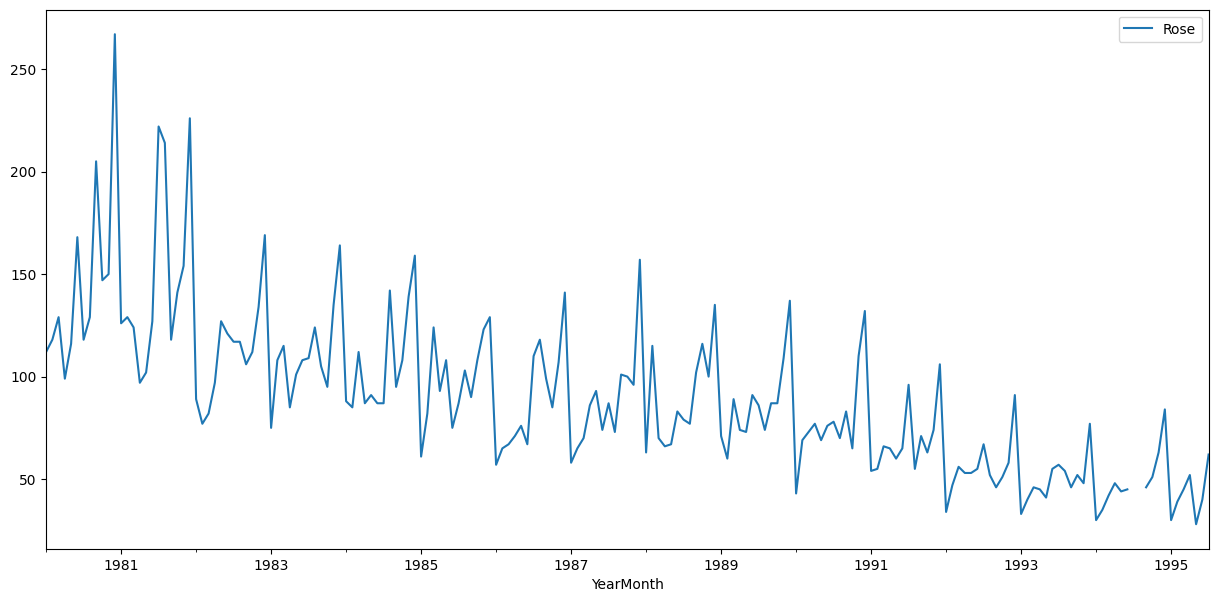

In [17]:
df.plot()
plt.show()

In [8]:
df.head()

YearMonth   Rose
0   1980-01  112.0
1   1980-02  118.0
2   1980-03  129.0
3   1980-04   99.0
4   1980-05  116.0

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   YearMonth  187 non-null    object 
 1   Rose       185 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.0+ KB


In [10]:
df.shape

(187, 2)

In [11]:
df.tail()

YearMonth  Rose
182   1995-03  45.0
183   1995-04  52.0
184   1995-05  28.0
185   1995-06  40.0
186   1995-07  62.0

In [12]:
df.describe().T

count       mean        std   min   25%   50%    75%    max
Rose  185.0  90.394595  39.175344  28.0  63.0  86.0  112.0  267.0

In [19]:
df.isnull().sum()

Rose    2
dtype: int64

We need to impute null values as in time series we can't proceed with null values

In [20]:
df[df['Rose'].isna()]

Rose
YearMonth       
1994-07-01   NaN
1994-08-01   NaN

In [21]:
nul_data = pd.isnull(df['Rose'])

# print only the data, Customers = NaN
df[nul_data]

Rose
YearMonth       
1994-07-01   NaN
1994-08-01   NaN

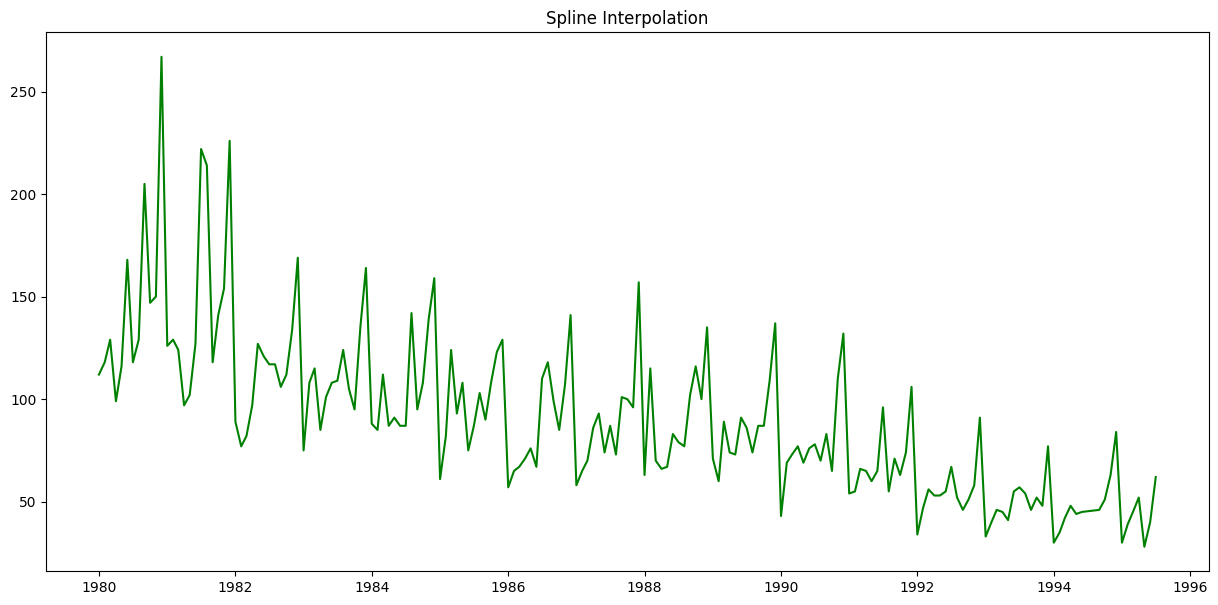

In [22]:
plt.rcParams['figure.figsize']=(15,7)

# on our data, impute the missing values using the interpolation techniques and specifically, the lineare method
df['Rose']= df['Rose'].interpolate(option='spline')

# plot the complete dataset
plt.plot(df['Rose'], color='green')

plt.title('Spline Interpolation')
plt.show()

In [23]:
df.isnull().sum()

Rose    0
dtype: int64

In [24]:
df.head()

Rose
YearMonth        
1980-01-01  112.0
1980-02-01  118.0
1980-03-01  129.0
1980-04-01   99.0
1980-05-01  116.0

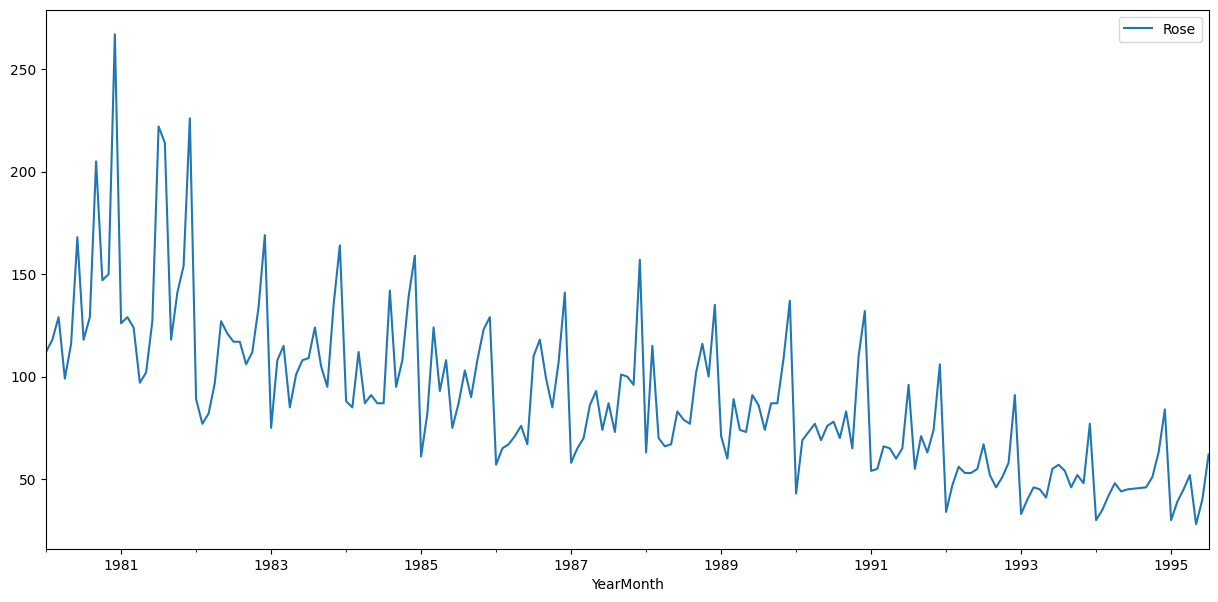

<Figure size 2000x800 with 0 Axes>

In [25]:
df.plot()
plt.figure(figsize=(20,8)) ;
plt.show();

In [26]:
# The following code is to set the subsequent figure sizes

from pylab import rcParams
rcParams['figure.figsize'] = 20,8

In [27]:
import seaborn as sns
from matplotlib import pyplot as plt

In [28]:
#Monthly Boxplot

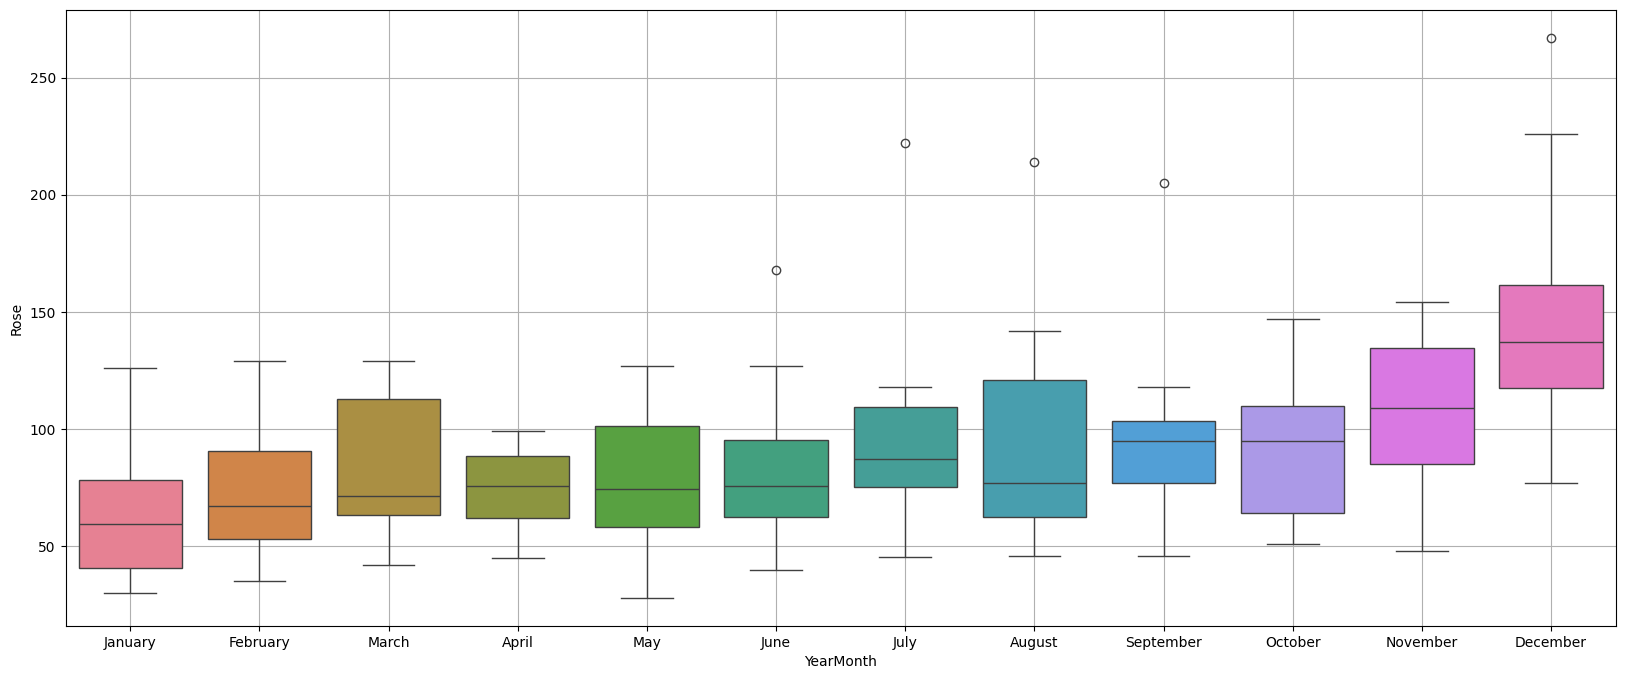

In [29]:
sns.boxplot(x = df.index.month_name(),y = df['Rose'] , hue = df.index.month_name())
plt.grid();


Yearly BOXPLOT

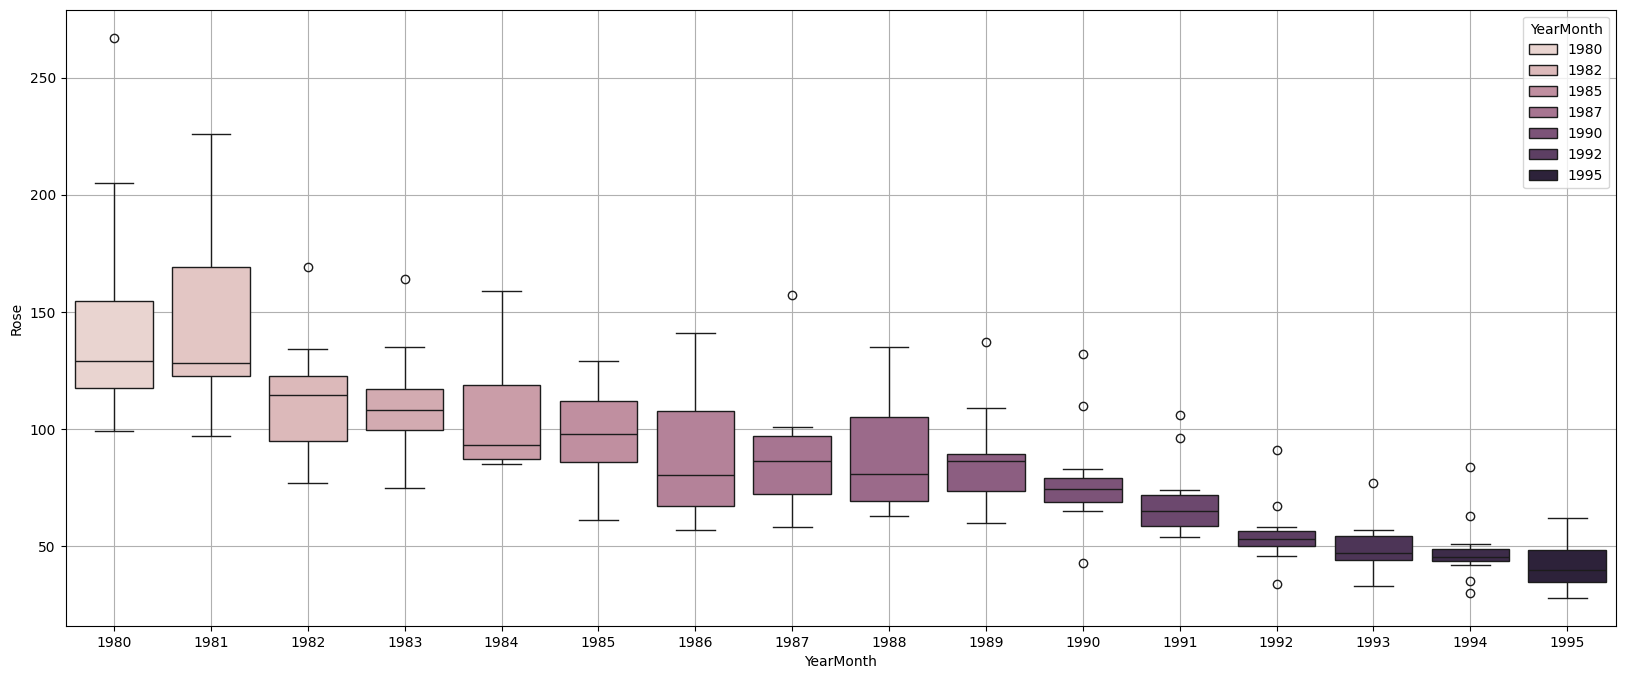

In [ ]:
sns.boxplot(x = df.index.year,y = df['Rose'] , hue = df.index.year )
plt.grid();

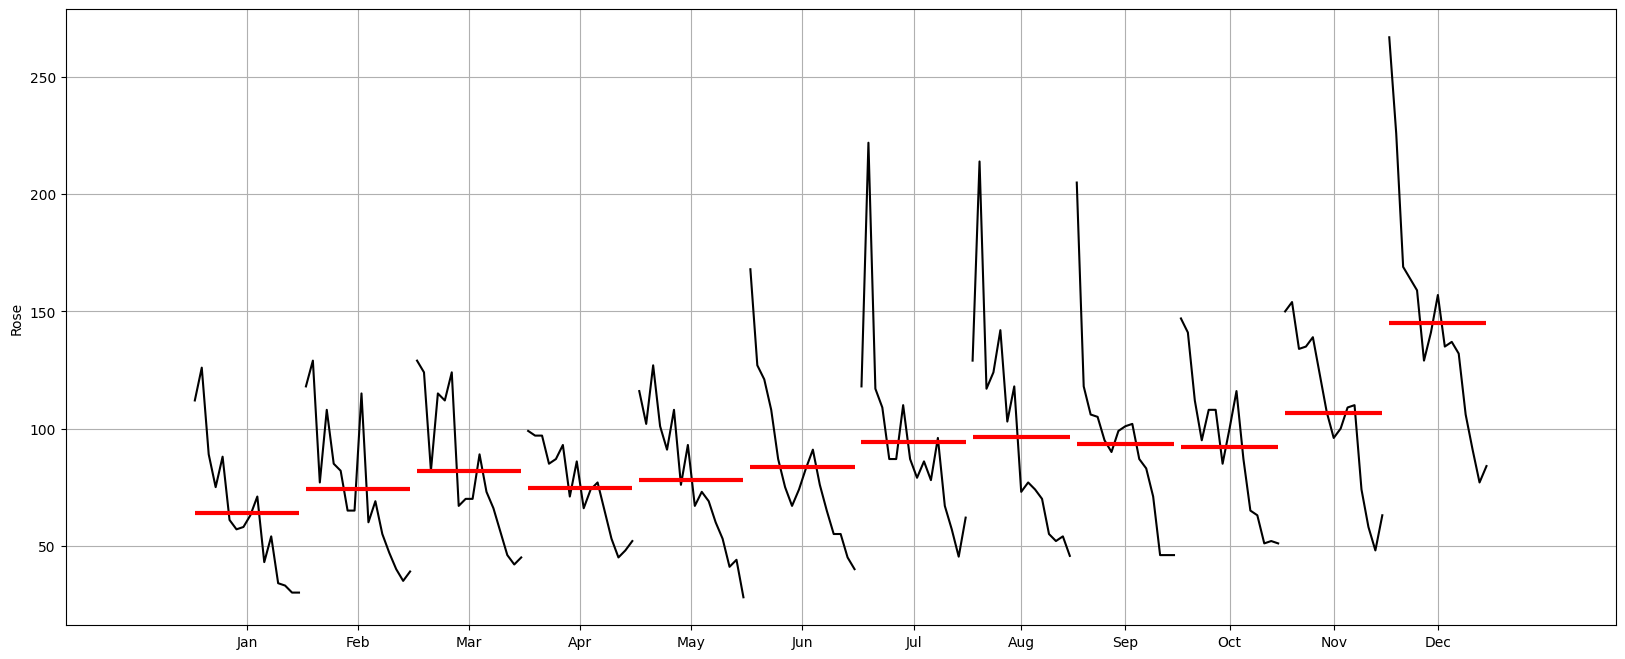

In [ ]:
from statsmodels.graphics.tsaplots import month_plot
month_plot(df['Rose'],ylabel='Rose')
plt.grid();


In [31]:
monthly_Rose_across_years = pd.pivot_table(df, values = 'Rose', columns = df.index.month, index = df.index.year)
monthly_Rose_across_years

YearMonth     1      2      3     4      5      6           7           8   \
YearMonth                                                                    
1980       112.0  118.0  129.0  99.0  116.0  168.0  118.000000  129.000000   
1981       126.0  129.0  124.0  97.0  102.0  127.0  222.000000  214.000000   
1982        89.0   77.0   82.0  97.0  127.0  121.0  117.000000  117.000000   
1983        75.0  108.0  115.0  85.0  101.0  108.0  109.000000  124.000000   
1984        88.0   85.0  112.0  87.0   91.0   87.0   87.000000  142.000000   
1985        61.0   82.0  124.0  93.0  108.0   75.0   87.000000  103.000000   
1986        57.0   65.0   67.0  71.0   76.0   67.0  110.000000  118.000000   
1987        58.0   65.0   70.0  86.0   93.0   74.0   87.000000   73.000000   
1988        63.0  115.0   70.0  66.0   67.0   83.0   79.000000   77.000000   
1989        71.0   60.0   89.0  74.0   73.0   91.0   86.000000   74.000000   
1990        43.0   69.0   73.0  77.0   69.0   76.0   78.000000   70.000000   
1991        54.0   55.0   66.0  65.0   60.0   65.0   96.000000   55.000000   
1992        34.0   47.0   56.0  53.0   53.0   55.0   67.000000   52.000000   
1993        33.0   40.0   46.0  45.0   41.0   55.0   57.000000   54.000000   
1994        30.0   35.0   42.0  48.0   44.0   45.0   45.333333   45.666667   
1995        30.0   39.0   45.0  52.0   28.0   40.0   62.000000         NaN   

YearMonth     9      10     11     12  
YearMonth                              
1980       205.0  147.0  150.0  267.0  
1981       118.0  141.0  154.0  226.0  
1982       106.0  112.0  134.0  169.0  
1983       105.0   95.0  135.0  164.0  
1984        95.0  108.0  139.0  159.0  
1985        90.0  108.0  123.0  129.0  
1986        99.0   85.0  107.0  141.0  
1987       101.0  100.0   96.0  157.0  
1988       102.0  116.0  100.0  135.0  
1989        87.0   87.0  109.0  137.0  
1990        83.0   65.0  110.0  132.0  
1991        71.0   63.0   74.0  106.0  
1992        46.0   51.0   58.0   91.0  
1993        46.0   52.0   48.0   77.0  
1994        46.0   51.0   63.0   84.0  
1995         NaN    NaN    NaN    NaN

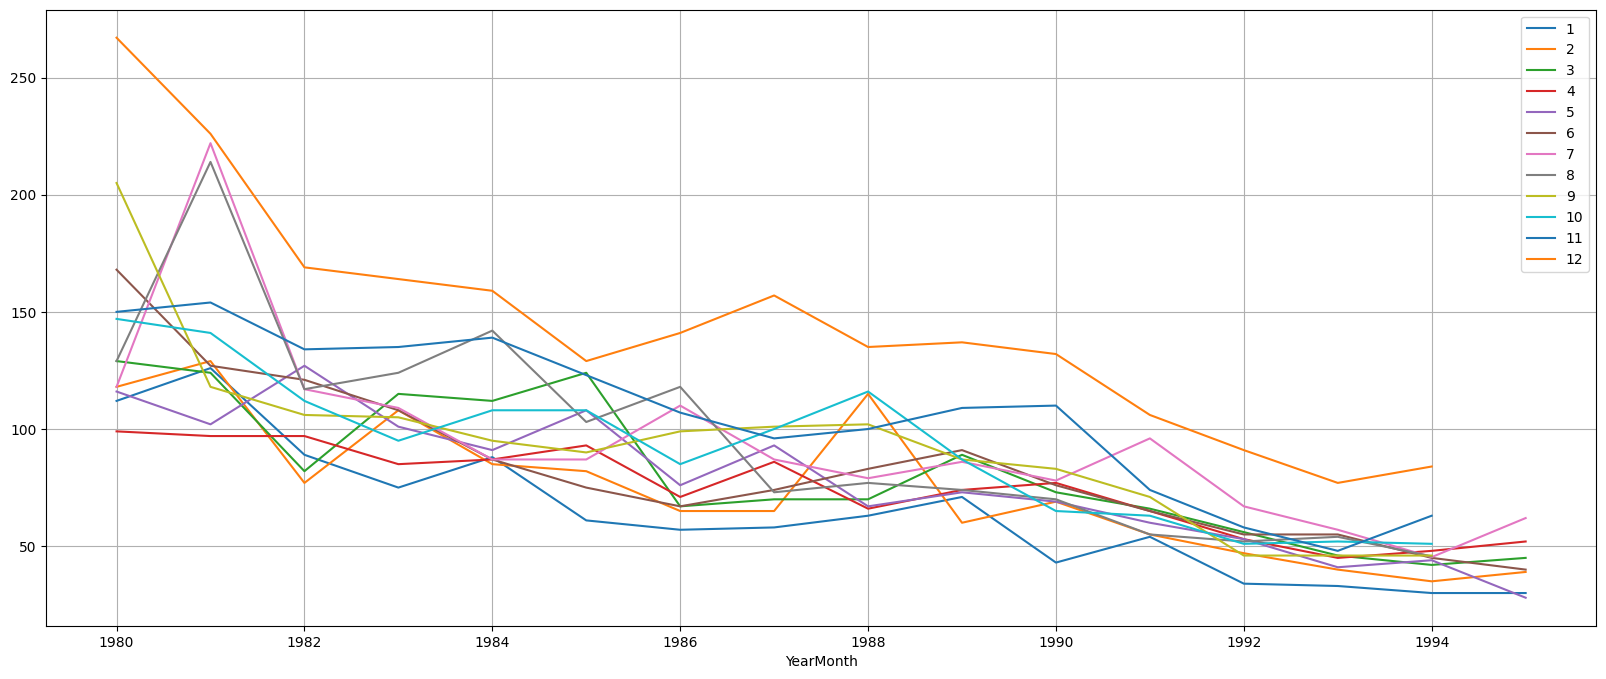

In [ ]:
monthly_Rose_across_years.plot()
plt.grid()
plt.legend(loc='best');

Plot the Empirical Cumulative Distribution.

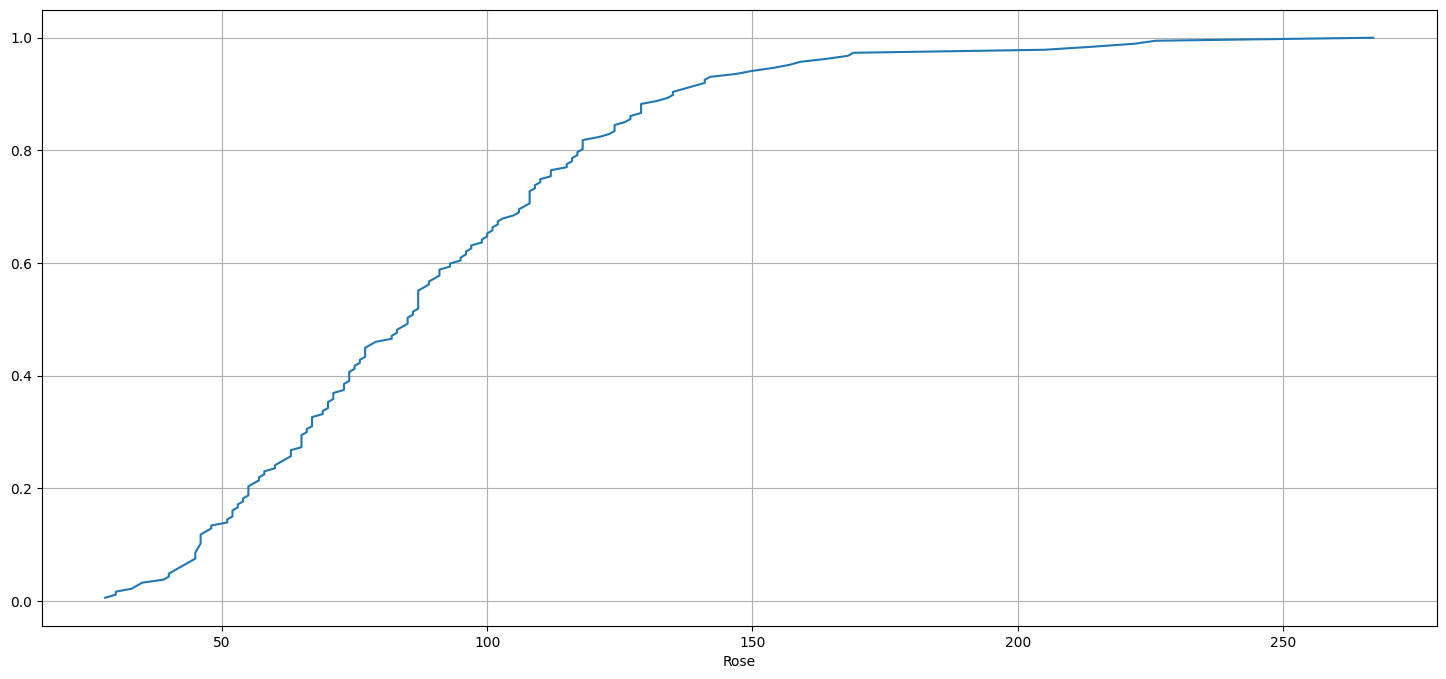

In [ ]:
# statistics
from statsmodels.distributions.empirical_distribution import ECDF

plt.figure(figsize = (18, 8))
cdf = ECDF(df['Rose'])
plt.plot(cdf.x, cdf.y, label = "statmodels");
plt.grid()
plt.xlabel('Rose');

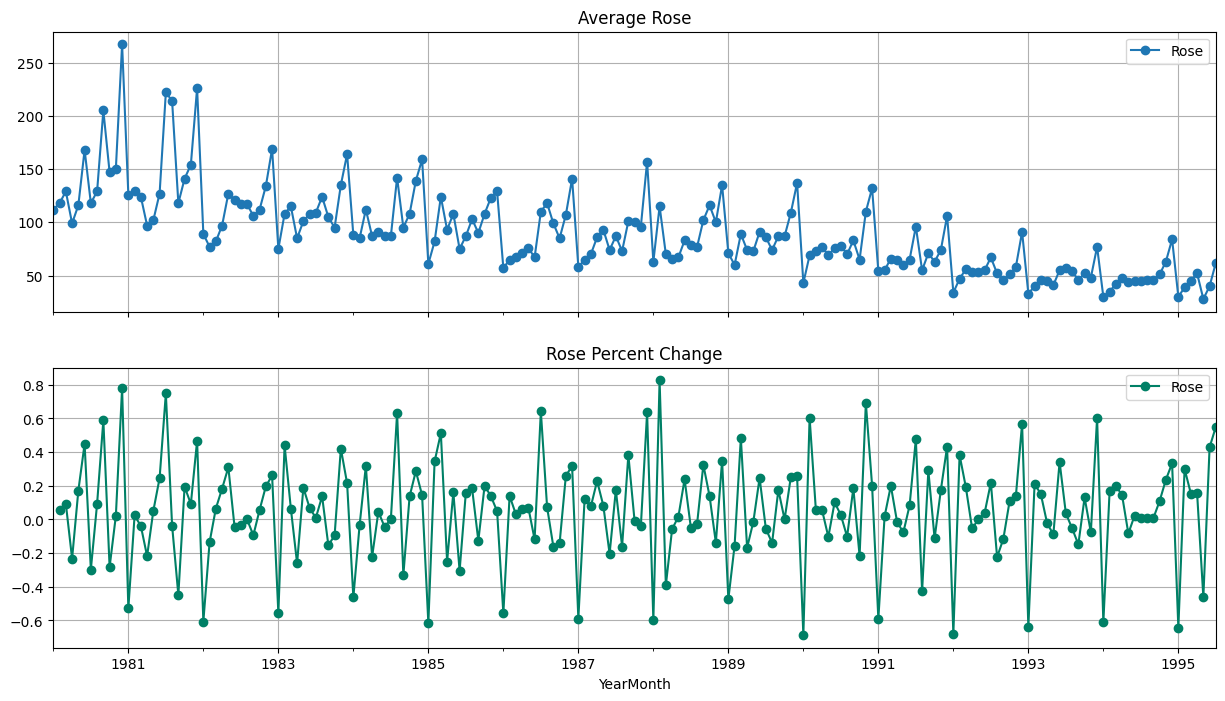

In [ ]:
# group by date and get average Rose, and precent change
average    = df.groupby(df.index)["Rose"].mean()
pct_change = df.groupby(df.index)["Rose"].sum().pct_change()

fig, (axis1,axis2) = plt.subplots(2,1,sharex=True,figsize=(15,8))

# plot average Rose over time(year-month)
ax1 = average.plot(legend=True,ax=axis1,marker='o',title="Average Rose",grid=True)
ax1.set_xticks(range(len(average)))
ax1.set_xticklabels(average.index.tolist())
# plot precent change for Rose  over time(year-month)
ax2 = pct_change.plot(legend=True,ax=axis2,marker='o',colormap="summer",title="Rose Percent Change",grid=True)

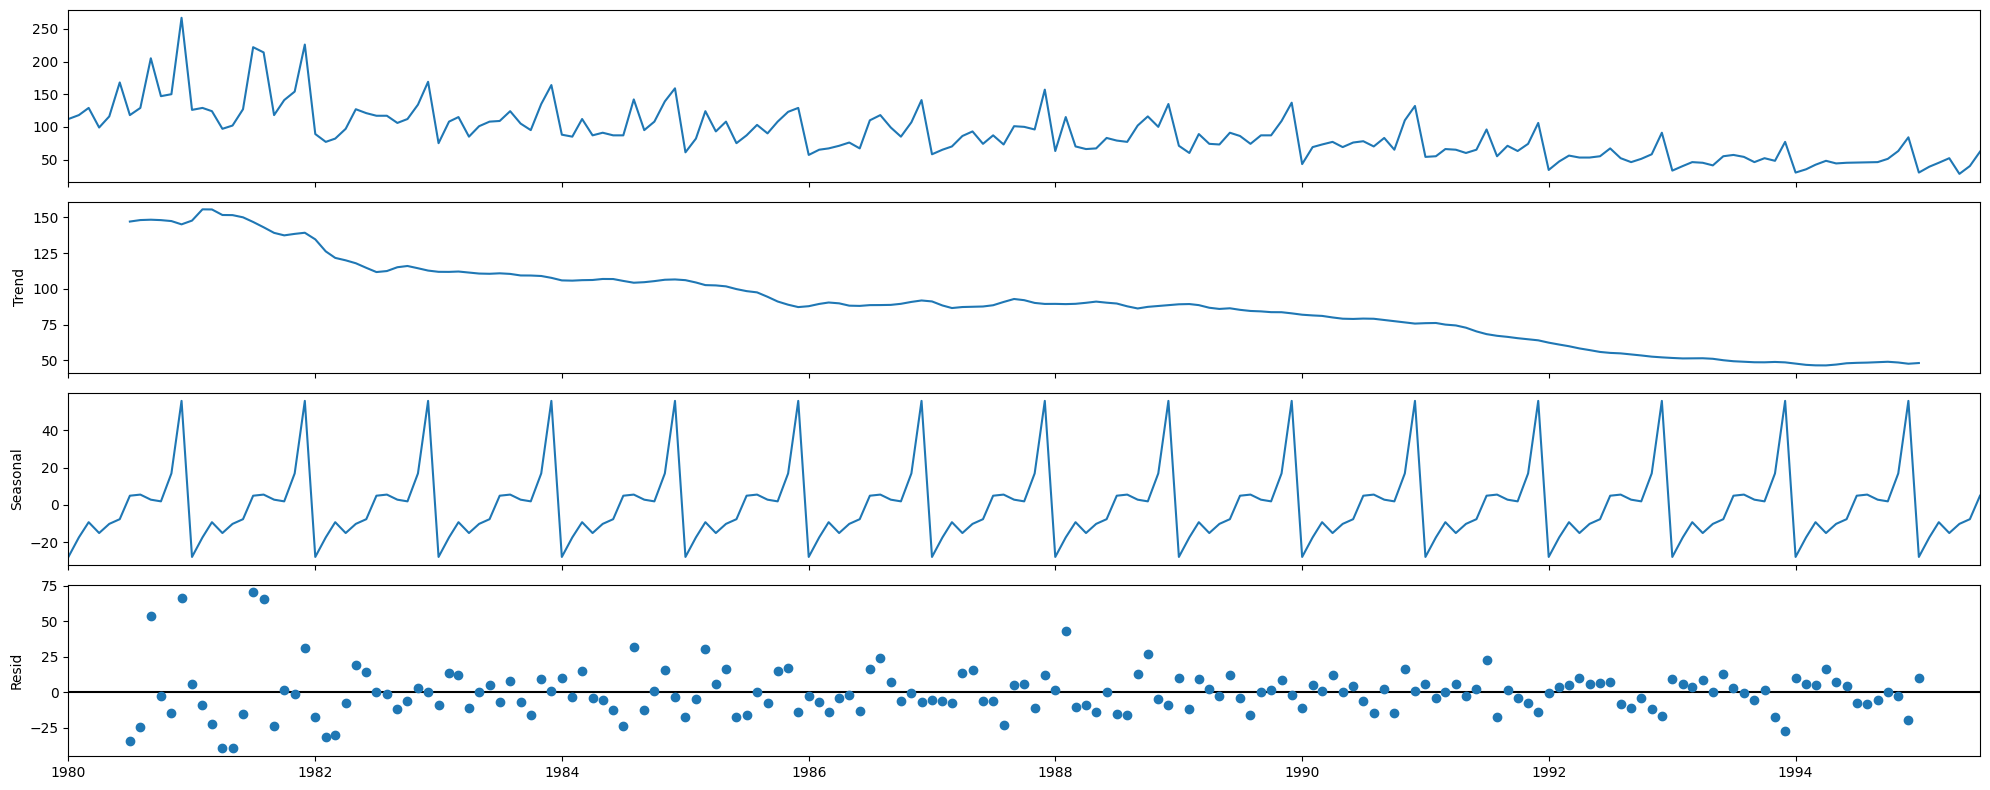

In [ ]:
df_decom_add=seasonal_decompose(df, model='additive' ,period=12)
df_decom_add.plot()
plt.show()

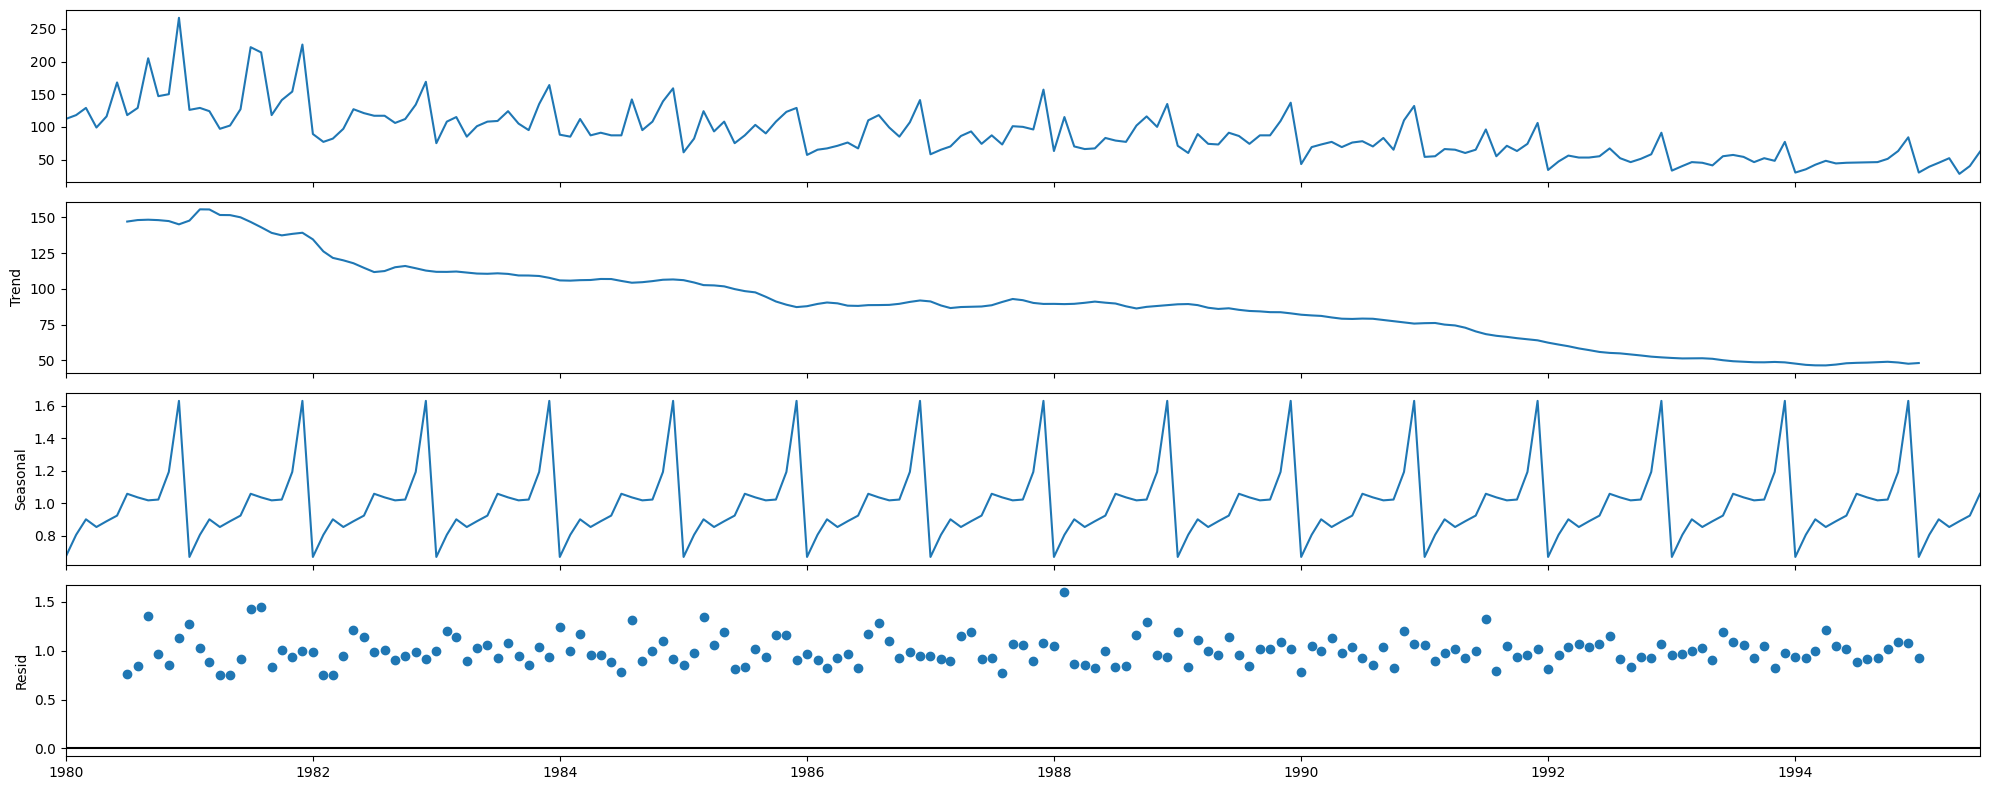

In [ ]:
df_mult=seasonal_decompose(df,model='multiplicative',period=12)
df_mult.plot()
plt.show()

In [ ]:
trend = df_decom_add.trend
seasonality = df_decom_add.seasonal
residual = df_decom_add.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 YearMonth
1980-01-01           NaN
1980-02-01           NaN
1980-03-01           NaN
1980-04-01           NaN
1980-05-01           NaN
1980-06-01           NaN
1980-07-01    147.083333
1980-08-01    148.125000
1980-09-01    148.375000
1980-10-01    148.083333
1980-11-01    147.416667
1980-12-01    145.125000
Name: trend, dtype: float64 

Seasonality 
 YearMonth
1980-01-01   -27.908647
1980-02-01   -17.435632
1980-03-01    -9.285830
1980-04-01   -15.098330
1980-05-01   -10.196544
1980-06-01    -7.678687
1980-07-01     4.896908
1980-08-01     5.499686
1980-09-01     2.774686
1980-10-01     1.871908
1980-11-01    16.846908
1980-12-01    55.713575
Name: seasonal, dtype: float64 

Residual 
 YearMonth
1980-01-01          NaN
1980-02-01          NaN
1980-03-01          NaN
1980-04-01          NaN
1980-05-01          NaN
1980-06-01          NaN
1980-07-01   -33.980241
1980-08-01   -24.624686
1980-09-01    53.850314
1980-10-01    -2.955241
1980-11-01   -14.263575
1980-12-01    66.16142

In [ ]:
train             = df[df.index<'1991']
test              = df[df.index>='1991']

In [ ]:
print('Training Data')
display(train)
print('Test Data')
display(test)

Training Data


Rose
YearMonth        
1980-01-01  112.0
1980-02-01  118.0
1980-03-01  129.0
1980-04-01   99.0
1980-05-01  116.0
...           ...
1990-08-01   70.0
1990-09-01   83.0
1990-10-01   65.0
1990-11-01  110.0
1990-12-01  132.0

[132 rows x 1 columns]

Test Data


Rose
YearMonth             
1991-01-01   54.000000
1991-02-01   55.000000
1991-03-01   66.000000
1991-04-01   65.000000
1991-05-01   60.000000
1991-06-01   65.000000
1991-07-01   96.000000
1991-08-01   55.000000
1991-09-01   71.000000
1991-10-01   63.000000
1991-11-01   74.000000
1991-12-01  106.000000
1992-01-01   34.000000
1992-02-01   47.000000
1992-03-01   56.000000
1992-04-01   53.000000
1992-05-01   53.000000
1992-06-01   55.000000
1992-07-01   67.000000
1992-08-01   52.000000
1992-09-01   46.000000
1992-10-01   51.000000
1992-11-01   58.000000
1992-12-01   91.000000
1993-01-01   33.000000
1993-02-01   40.000000
1993-03-01   46.000000
1993-04-01   45.000000
1993-05-01   41.000000
1993-06-01   55.000000
1993-07-01   57.000000
1993-08-01   54.000000
1993-09-01   46.000000
1993-10-01   52.000000
1993-11-01   48.000000
1993-12-01   77.000000
1994-01-01   30.000000
1994-02-01   35.000000
1994-03-01   42.000000
1994-04-01   48.000000
1994-05-01   44.000000
1994-06-01   45.000000
1994-07-01   45.333333
1994-08-01   45.666667
1994-09-01   46.000000
1994-10-01   51.000000
1994-11-01   63.000000
1994-12-01   84.000000
1995-01-01   30.000000
1995-02-01   39.000000
1995-03-01   45.000000
1995-04-01   52.000000
1995-05-01   28.000000
1995-06-01   40.000000
1995-07-01   62.000000

In [ ]:
test.describe()

Rose
count   55.000000
mean    53.854545
std     15.905038
min     28.000000
25%     45.000000
50%     52.000000
75%     61.000000
max    106.000000

In [ ]:
train.describe()

Rose
count  132.000000
mean   104.939394
std     36.171508
min     43.000000
25%     77.750000
50%     99.500000
75%    121.500000
max    267.000000

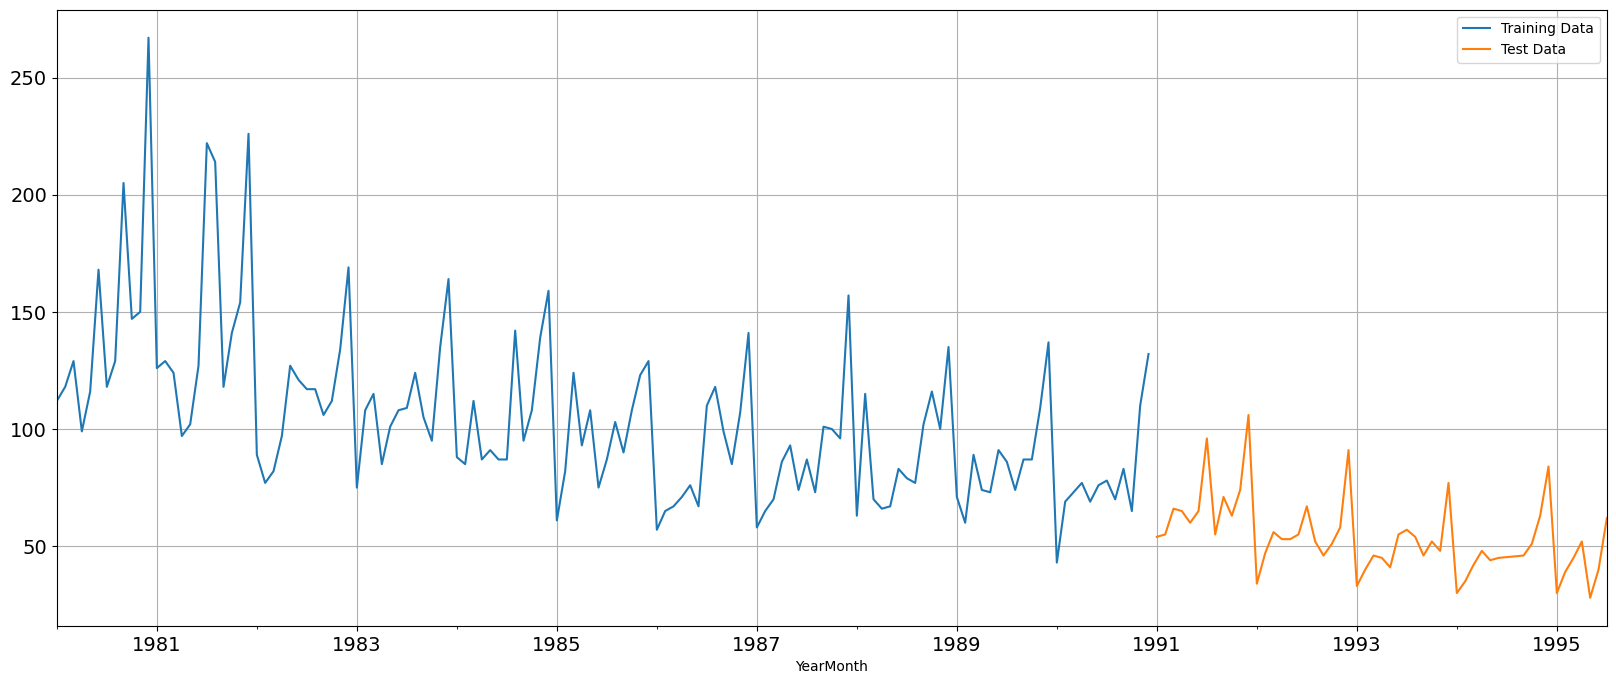

In [ ]:
train['Rose'].plot(fontsize=14)
test['Rose'].plot(fontsize=14)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.show()

Model 1: Linear Regression

In [ ]:
print(train.shape)
print(test.shape)

(132, 1)
(55, 1)


In [ ]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+133 for i in range(len(test))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


In [ ]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

In [ ]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

print('First few rows of Training Data')
display(LinearRegression_train.head())
print('Last few rows of Training Data')
display(LinearRegression_train.tail())
print('First few rows of Test Data')
display(LinearRegression_test.head())
print('Last few rows of Test Data')
display(LinearRegression_test.tail())

First few rows of Training Data


Rose  time
YearMonth              
1980-01-01  112.0     1
1980-02-01  118.0     2
1980-03-01  129.0     3
1980-04-01   99.0     4
1980-05-01  116.0     5

Last few rows of Training Data


Rose  time
YearMonth              
1990-08-01   70.0   128
1990-09-01   83.0   129
1990-10-01   65.0   130
1990-11-01  110.0   131
1990-12-01  132.0   132

First few rows of Test Data


Rose  time
YearMonth             
1991-01-01  54.0   133
1991-02-01  55.0   134
1991-03-01  66.0   135
1991-04-01  65.0   136
1991-05-01  60.0   137

Last few rows of Test Data


Rose  time
YearMonth             
1995-03-01  45.0   183
1995-04-01  52.0   184
1995-05-01  28.0   185
1995-06-01  40.0   186
1995-07-01  62.0   187

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr = LinearRegression()

In [ ]:
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Rose'])

LinearRegression()

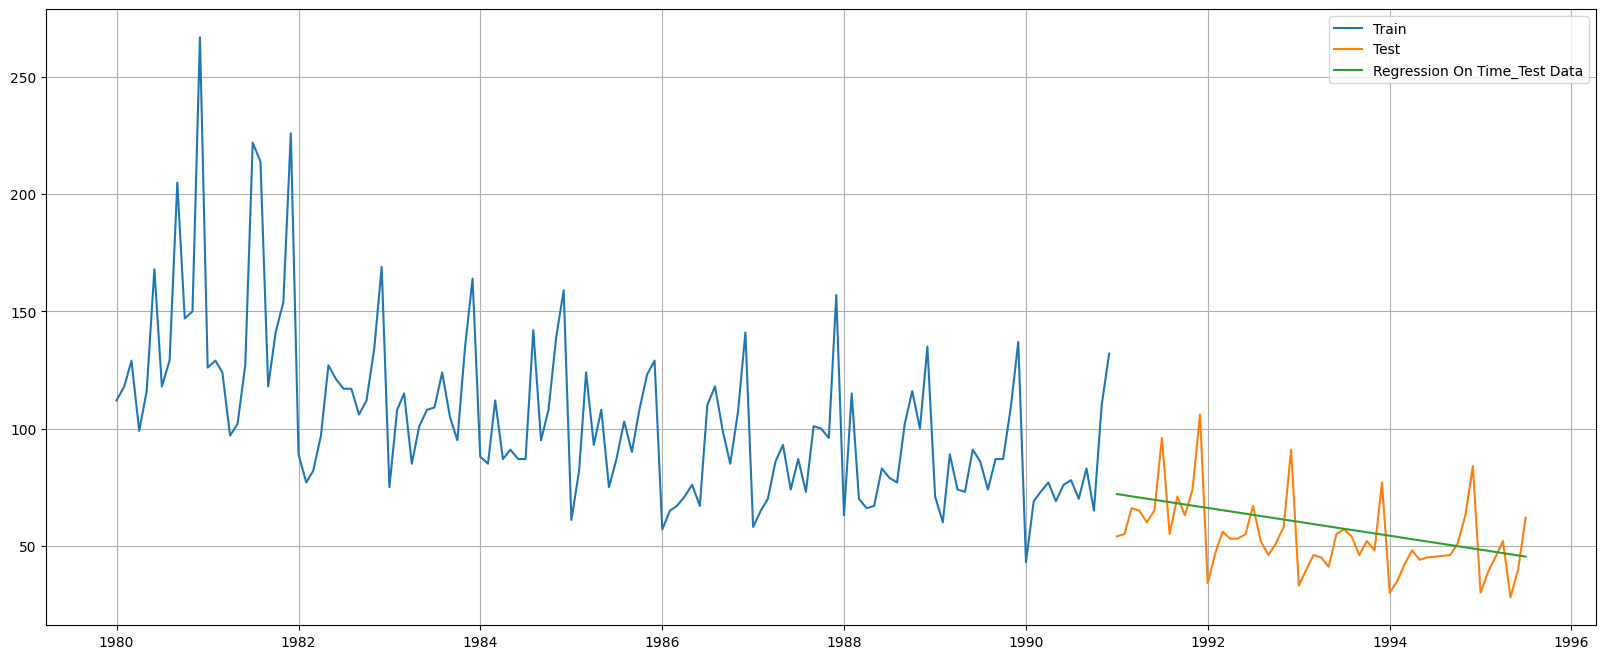

In [ ]:
train_predictions_model1         = lr.predict(LinearRegression_train[['time']])
LinearRegression_train['RegOnTime'] = train_predictions_model1

test_predictions_model1         = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

plt.plot( train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')

plt.legend(loc='best')
plt.grid();

In [ ]:
from sklearn import metrics

In [ ]:
rmse_model1_test = metrics.mean_squared_error(test['Rose'],test_predictions_model1,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f " %(rmse_model1_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 15.269 


In [ ]:
resultsDf = pd.DataFrame({'Test RMSE': [rmse_model1_test]},index=['Linear Regression'])
resultsDf

Test RMSE
Linear Regression  15.268955

Model 2: Naive Approach:

In [ ]:
NaiveModel_train = train.copy()
NaiveModel_test = test.copy()

In [ ]:
train.tail()

Rose
YearMonth        
1990-08-01   70.0
1990-09-01   83.0
1990-10-01   65.0
1990-11-01  110.0
1990-12-01  132.0

In [ ]:
NaiveModel_test['naive'] = np.asarray(train['Rose'])[len(np.asarray(train['Rose']))-1]
NaiveModel_test['naive'].head()

YearMonth
1991-01-01    132.0
1991-02-01    132.0
1991-03-01    132.0
1991-04-01    132.0
1991-05-01    132.0
Name: naive, dtype: float64

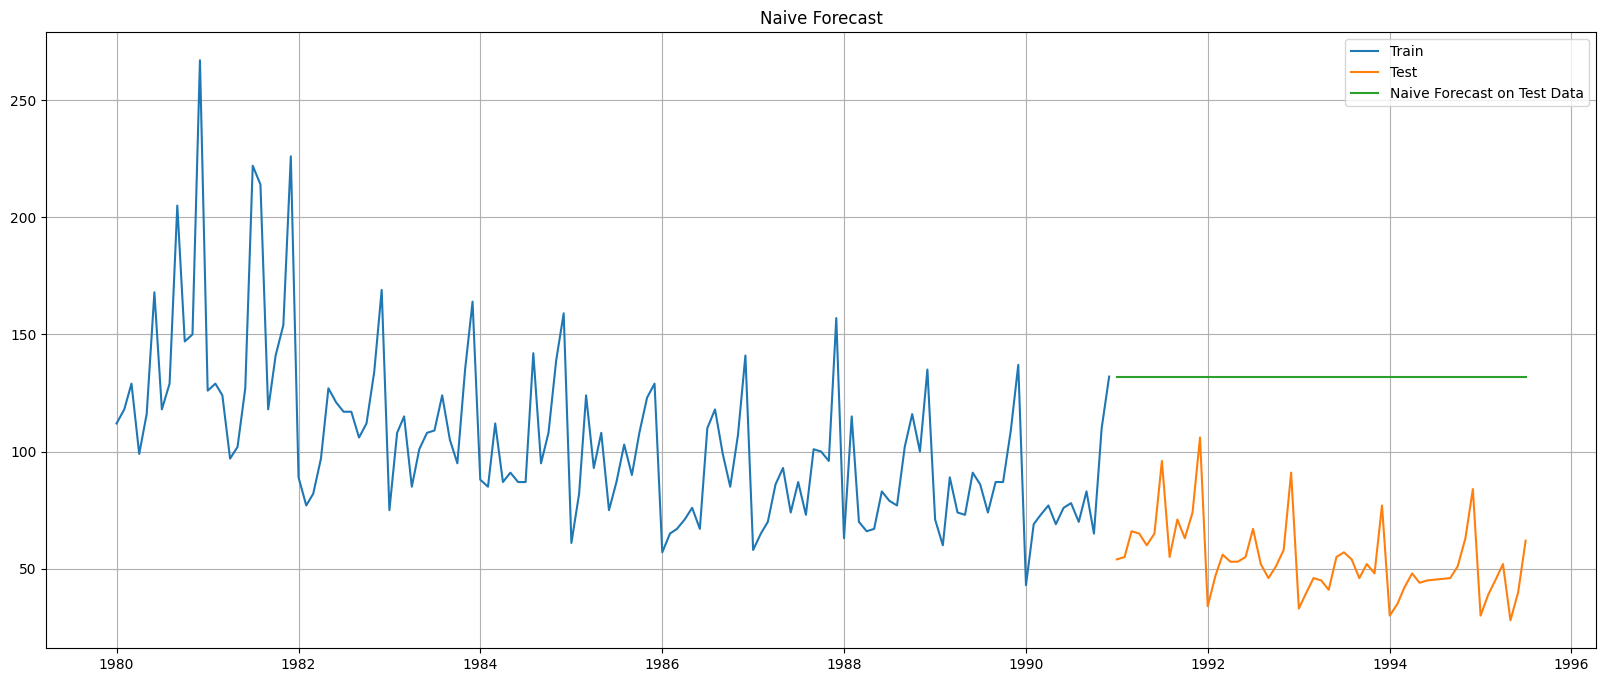

In [ ]:
plt.plot(NaiveModel_train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')

plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')

plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();

In [ ]:
rmse_model2_test = metrics.mean_squared_error(test['Rose'],NaiveModel_test['naive'],squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model2_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 79.719


In [ ]:
resultsDf_2 = pd.DataFrame({'Test RMSE': [rmse_model2_test]},index=['NaiveModel'])

resultsDf = pd.concat([resultsDf, resultsDf_2])
resultsDf

Test RMSE
Linear Regression  15.268955
NaiveModel         79.718773

Method 3: Simple Average

In [ ]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

In [ ]:
SimpleAverage_test['mean_forecast'] = train['Rose'].mean()
SimpleAverage_test.head()

Rose  mean_forecast
YearMonth                      
1991-01-01  54.0     104.939394
1991-02-01  55.0     104.939394
1991-03-01  66.0     104.939394
1991-04-01  65.0     104.939394
1991-05-01  60.0     104.939394

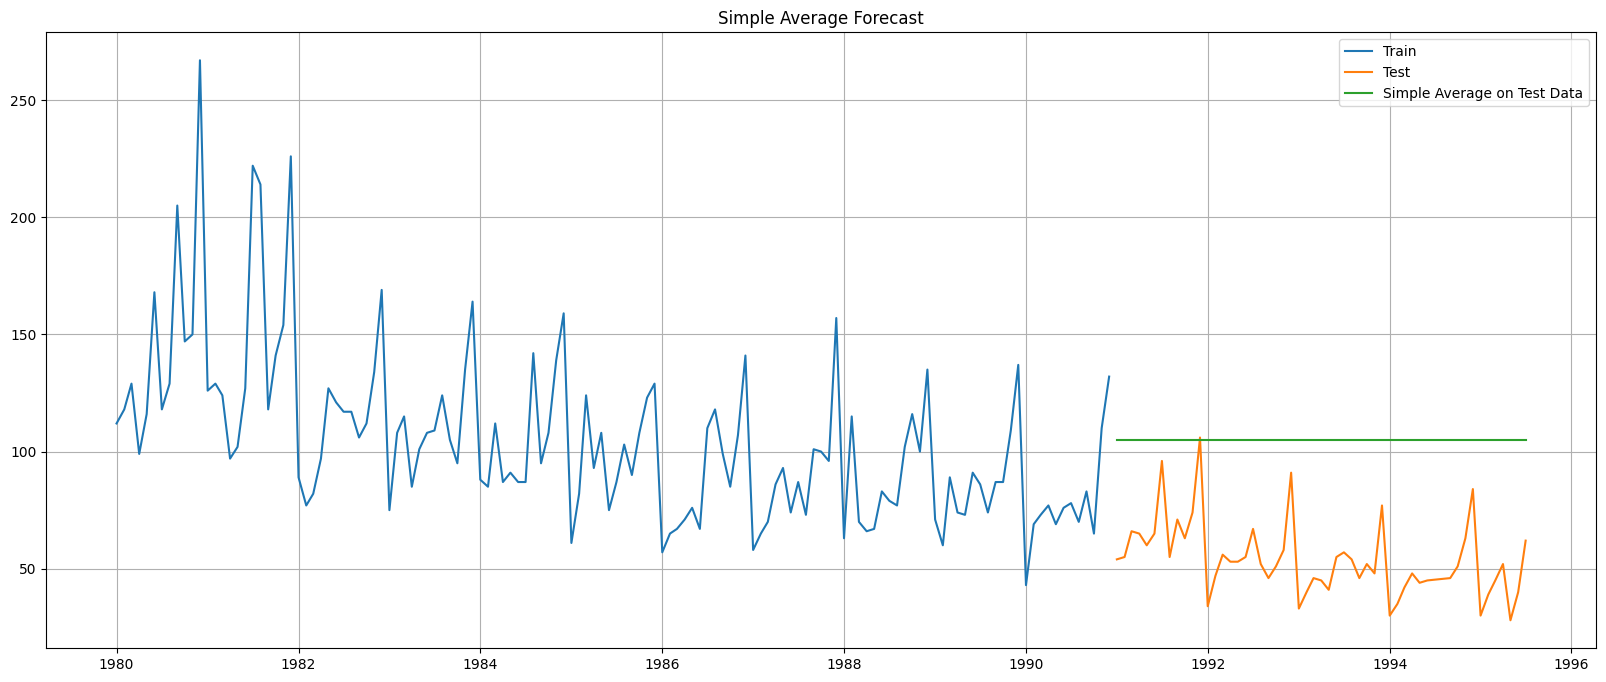

In [ ]:
plt.plot(SimpleAverage_train['Rose'], label='Train')
plt.plot(SimpleAverage_test['Rose'], label='Test')

plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')

plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

In [ ]:
rmse_model3_test = metrics.mean_squared_error(test['Rose'],SimpleAverage_test['mean_forecast'],squared=False)
print("For Simple Average forecast on the Test Data,  RMSE is %3.3f" %(rmse_model3_test))

For Simple Average forecast on the Test Data,  RMSE is 53.461


In [ ]:
resultsDf_3 = pd.DataFrame({'Test RMSE': [rmse_model3_test]}
                           ,index=['SimpleAverageModel'])

resultsDf = pd.concat([resultsDf, resultsDf_3])
resultsDf

Test RMSE
Linear Regression   15.268955
NaiveModel          79.718773
SimpleAverageModel  53.460570

Method 4: Moving Average(MA)

In [ ]:
MovingAverage = df.copy()
MovingAverage.head()

Rose
YearMonth        
1980-01-01  112.0
1980-02-01  118.0
1980-03-01  129.0
1980-04-01   99.0
1980-05-01  116.0

Trailing moving averages

In [ ]:
MovingAverage['Trailing_2'] = MovingAverage['Rose'].rolling(2).mean()
MovingAverage['Trailing_4'] = MovingAverage['Rose'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['Rose'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['Rose'].rolling(9).mean()

MovingAverage.head()

Rose  Trailing_2  Trailing_4  Trailing_6  Trailing_9
YearMonth                                                        
1980-01-01  112.0         NaN         NaN         NaN         NaN
1980-02-01  118.0       115.0         NaN         NaN         NaN
1980-03-01  129.0       123.5         NaN         NaN         NaN
1980-04-01   99.0       114.0       114.5         NaN         NaN
1980-05-01  116.0       107.5       115.5         NaN         NaN

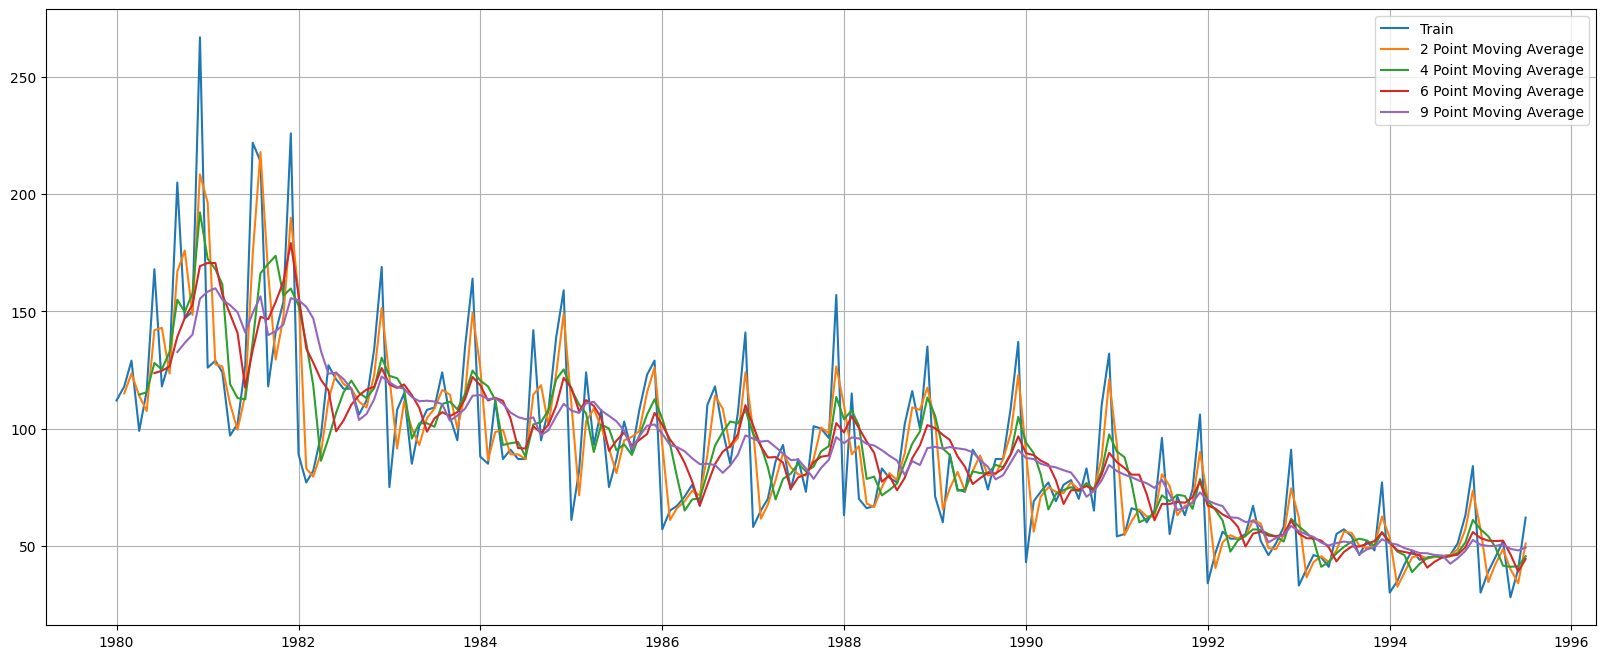

In [ ]:
## Plotting on the whole data

plt.plot(MovingAverage['Rose'], label='Train')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Trailing_9'],label = '9 Point Moving Average')

plt.legend(loc = 'best')
plt.grid();

In [ ]:
#Creating train and test set
trailing_MovingAverage_train=MovingAverage[MovingAverage.index < '1991-01-01']
trailing_MovingAverage_test=MovingAverage[MovingAverage.index >= '1991-01-01']
print(trailing_MovingAverage_test.shape)
print(trailing_MovingAverage_train.shape)

(55, 5)
(132, 5)


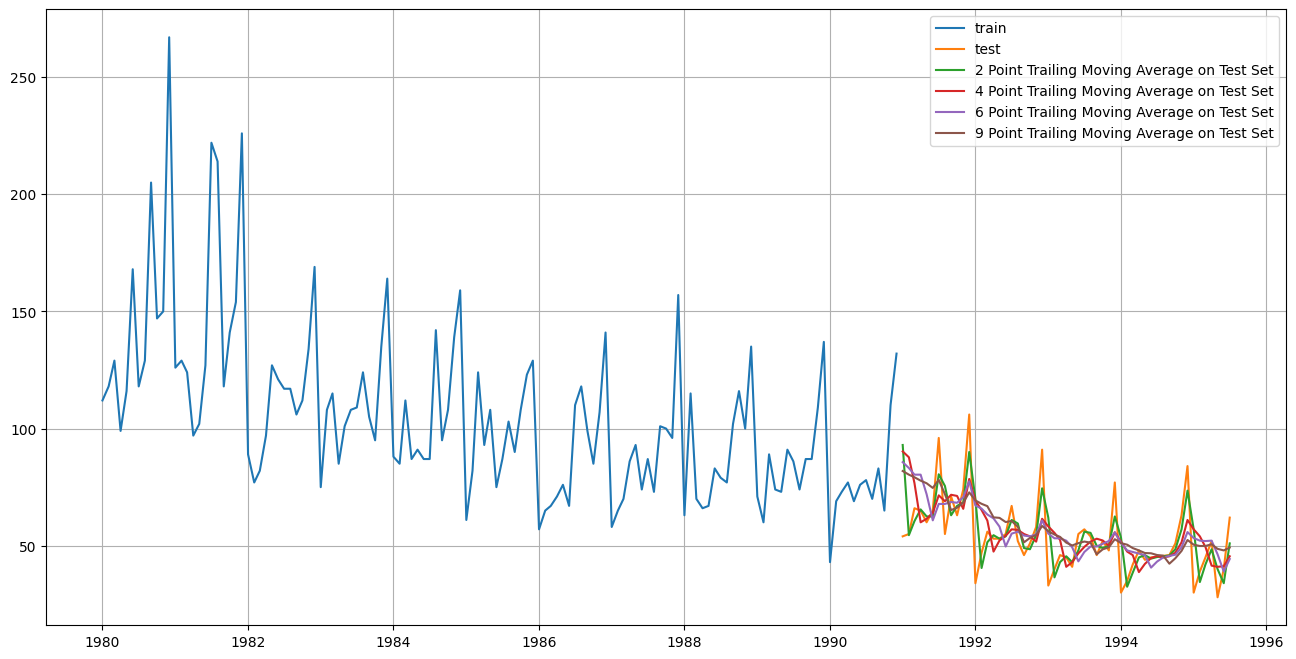

In [ ]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(trailing_MovingAverage_train['Rose'], label='train')
plt.plot(trailing_MovingAverage_test['Rose'], label='test')


plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')

plt.legend(loc = 'best')
plt.grid();

In [ ]:
## Test Data - RMSE --> 2 point Trailing MA
rmse_model4_test_2 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_2'],squared=False)

## Test Data - RMSE  --> 4 point Trailing MA
rmse_model4_test_4 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_4'],squared=False)

## Test Data - RMSE --> 6 point Trailing MA
rmse_model4_test_6 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_6'],squared=False)

## Test Data - RMSE  --> 9 point Trailing MA
rmse_model4_test_9 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_9'],squared=False)

In [ ]:
resultsDf_4 = pd.DataFrame({'Test RMSE': [rmse_model4_test_2,rmse_model4_test_4
                                          ,rmse_model4_test_6,rmse_model4_test_9]}
                           ,index=['2pointTrailingMovingAverage','4pointTrailingMovingAverage'
                                   ,'6pointTrailingMovingAverage','9pointTrailingMovingAverage'])

resultsDf = pd.concat([resultsDf, resultsDf_4])
resultsDf

Test RMSE
Linear Regression            15.268955
NaiveModel                   79.718773
SimpleAverageModel           53.460570
2pointTrailingMovingAverage  11.529278
4pointTrailingMovingAverage  14.451403
6pointTrailingMovingAverage  14.566327
9pointTrailingMovingAverage  14.727630

Simple exponential

In [ ]:
SES_train = train.copy()
SES_test = test.copy()

In [ ]:
model_SES = SimpleExpSmoothing(SES_train['Rose'])

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [ ]:
model_SES_autofit = model_SES.fit(optimized=True)

In [ ]:
model_SES_autofit.params

{'smoothing_level': 0.12362013466760018,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 112.0,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [ ]:
resultsDf_temp = pd.DataFrame({'Alpha Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_temp

Empty DataFrame
Columns: [Alpha Values, Train RMSE, Test RMSE]
Index: []

In [ ]:
SES_test['predict'] = model_SES_autofit.forecast(steps=len(test))
SES_test.head()

Rose  (predict, 0.1)  (predict, 0.2)  \
YearMonth                                          
1991-01-01  54.0       87.140177       92.096329   
1991-02-01  55.0       87.140177       92.096329   
1991-03-01  66.0       87.140177       92.096329   
1991-04-01  65.0       87.140177       92.096329   
1991-05-01  60.0       87.140177       92.096329   

            (predict, 0.30000000000000004)  (predict, 0.4)  (predict, 0.5)  \
YearMonth                                                                    
1991-01-01                       98.669021      105.260413       111.37647   
1991-02-01                       98.669021      105.260413       111.37647   
1991-03-01                       98.669021      105.260413       111.37647   
1991-04-01                       98.669021      105.260413       111.37647   
1991-05-01                       98.669021      105.260413       111.37647   

            (predict, 0.6)  (predict, 0.7000000000000001)  (predict, 0.8)  \
YearMonth                                                                   
1991-01-01       116.88547                     121.747572       125.92556   
1991-02-01       116.88547                     121.747572       125.92556   
1991-03-01       116.88547                     121.747572       125.92556   
1991-04-01       116.88547                     121.747572       125.92556   
1991-05-01       116.88547                     121.747572       125.92556   

            (predict, 0.9)    predict  
YearMonth                              
1991-01-01      129.366777  87.983765  
1991-02-01      129.366777  87.983765  
1991-03-01      129.366777  87.983765  
1991-04-01      129.366777  87.983765  
1991-05-01      129.366777  87.983765

In [ ]:
resultsDf_temp = pd.DataFrame({'Alpha Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_temp

for i in np.arange(0.1,1,0.1):
    model_SES_alpha_i = model_SES.fit(smoothing_level=i,optimized=False,use_brute=True)
    SES_train['predict',i] = model_SES_alpha_i.fittedvalues
    SES_test['predict',i] = model_SES_alpha_i.forecast(steps=len(SES_test))

    rmse_model5_train_i = metrics.mean_squared_error(SES_train['Rose'],SES_train['predict',i],squared=False)

    rmse_model5_test_i = metrics.mean_squared_error(SES_test['Rose'],SES_test['predict',i],squared=False)

    resultsDf_temp = resultsDf_temp.append({'Alpha Values':i,'Train RMSE':rmse_model5_train_i
                                      ,'Test RMSE':rmse_model5_test_i}, ignore_index=True)

<ipython-input-259-117550ff56a7>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_temp = resultsDf_temp.append({'Alpha Values':i,'Train RMSE':rmse_model5_train_i
<ipython-input-259-117550ff56a7>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_temp = resultsDf_temp.append({'Alpha Values':i,'Train RMSE':rmse_model5_train_i
<ipython-input-259-117550ff56a7>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_temp = resultsDf_temp.append({'Alpha Values':i,'Train RMSE':rmse_model5_train_i
<ipython-input-259-117550ff56a7>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_temp = resultsDf_temp.append({'A

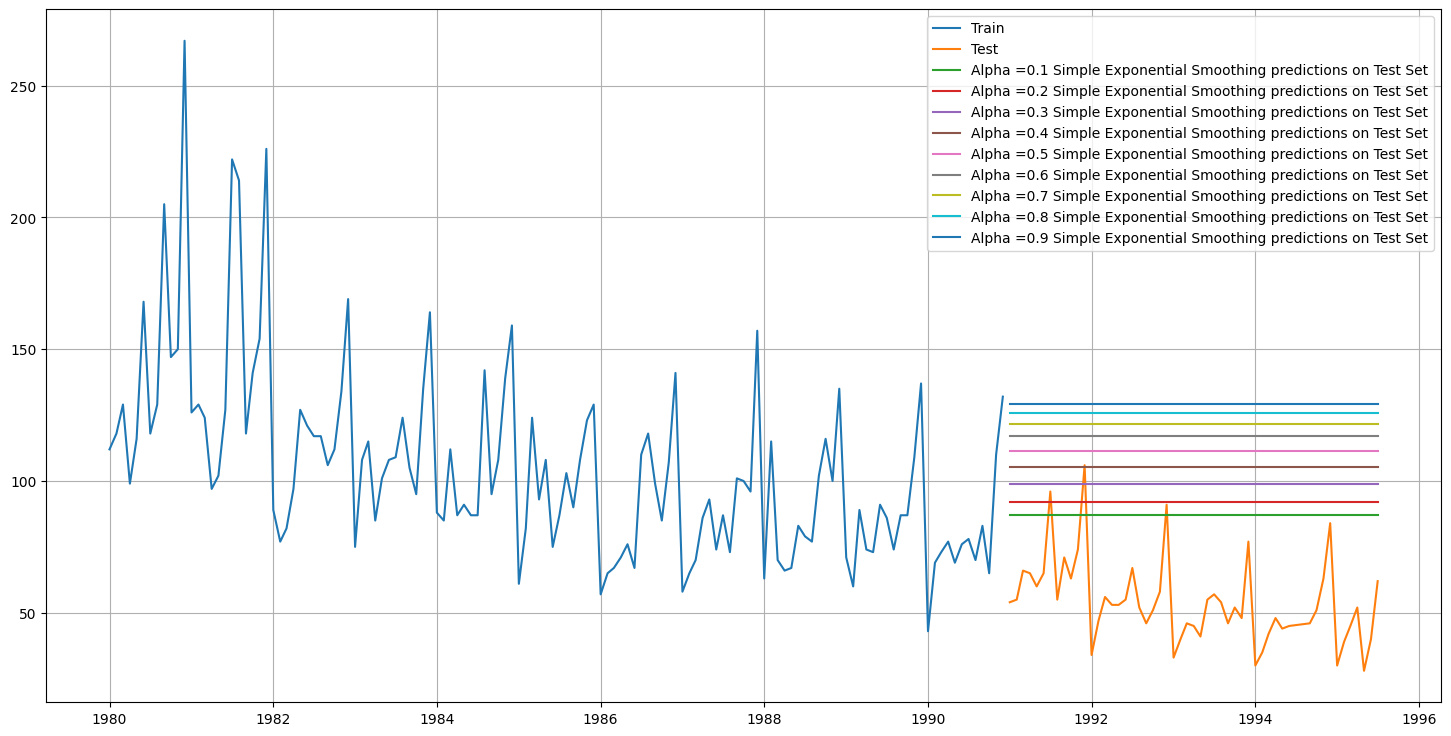

In [ ]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(SES_train['Rose'], label='Train')
plt.plot(SES_test['Rose'], label='Test')

plt.plot(SES_test['predict', 0.1], label='Alpha =0.1 Simple Exponential Smoothing predictions on Test Set')
plt.plot(SES_test['predict', 0.2], label='Alpha =0.2 Simple Exponential Smoothing predictions on Test Set')
plt.plot(SES_test['predict', 0.30000000000000004], label='Alpha =0.3 Simple Exponential Smoothing predictions on Test Set')
plt.plot(SES_test['predict', 0.4], label='Alpha =0.4 Simple Exponential Smoothing predictions on Test Set')
plt.plot(SES_test['predict', 0.5], label='Alpha =0.5 Simple Exponential Smoothing predictions on Test Set')
plt.plot(SES_test['predict', 0.6], label='Alpha =0.6 Simple Exponential Smoothing predictions on Test Set')
plt.plot(SES_test['predict', 0.7000000000000001], label='Alpha =0.7 Simple Exponential Smoothing predictions on Test Set')
plt.plot(SES_test['predict', 0.8], label='Alpha =0.8 Simple Exponential Smoothing predictions on Test Set')
plt.plot(SES_test['predict', 0.9], label='Alpha =0.9 Simple Exponential Smoothing predictions on Test Set')



plt.legend(loc='best')
plt.grid();

In [ ]:
resultsDf_temp.sort_values(by=['Test RMSE']).head(9)

Alpha Values  Train RMSE  Test RMSE
0           0.1   31.815610  36.828033
1           0.2   31.979391  41.361876
2           0.3   32.470164  47.504821
3           0.4   33.035130  53.767406
4           0.5   33.682839  59.641786
5           0.6   34.441171  64.971288
6           0.7   35.323261  69.698162
7           0.8   36.334596  73.773992
8           0.9   37.482782  77.139276

In [ ]:
resultsDf_temp.sort_values(by=['Test RMSE'],ascending=True)

## Test Data
resultsDf_5 = pd.DataFrame({'Test RMSE': [resultsDf_temp.sort_values(by=['Test RMSE'],ascending=True).values[0][2]]}
                           ,index=['Alpha=0.1,SimpleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_5])
resultsDf


Test RMSE
Linear Regression                     15.268955
NaiveModel                            79.718773
SimpleAverageModel                    53.460570
2pointTrailingMovingAverage           11.529278
4pointTrailingMovingAverage           14.451403
6pointTrailingMovingAverage           14.566327
9pointTrailingMovingAverage           14.727630
Alpha=0.1,SimpleExponentialSmoothing  36.828033

 Double Exponential Smoothing (Holt's Model)

In [ ]:
DES_train = train.copy()
DES_test = test.copy()

In [ ]:
model_DES = Holt(DES_train['Rose'])

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [ ]:
resultsDf_6 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Train RMSE':[],'Test RMSE': []})
model_DES_autofit = model_DES.fit(optimized=True)

model_DES_autofit.params

{'smoothing_level': 0.16213321015010723,
 'smoothing_trend': 0.13152155372234675,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 112.0,
 'initial_trend': 6.0,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [ ]:
DES_test['predict'] = model_DES_autofit.forecast(steps=len(test))
DES_test.head()

Rose    predict
YearMonth                  
1991-01-01  54.0  87.249993
1991-02-01  55.0  88.152722
1991-03-01  66.0  89.055451
1991-04-01  65.0  89.958180
1991-05-01  60.0  90.860910

In [ ]:
del resultsDf_temp
## First we will define an empty dataframe to store our values from the loop

resultsDf_temp = pd.DataFrame({'Alpha Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_temp

Empty DataFrame
Columns: [Alpha Values, Train RMSE, Test RMSE]
Index: []

In [ ]:
## Test Data

rmse_model_temp = metrics.mean_squared_error(SES_test['Rose'],SES_test['predict'],squared=False)
print("For Alpha =0.6477, Beta = 0.0 Double Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f" %(rmse_model_temp))

For Alpha =0.6477, Beta = 0.0 Double Exponential Smoothing Model forecast on the Test Data, RMSE is 37.592


In [ ]:
for i in np.arange(0.1,1.1,0.1):
    for j in np.arange(0.1,1.1,0.1):
        model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
        DES_train['predict',i,j] = model_DES_alpha_i_j.fittedvalues
        DES_test['predict',i,j] = model_DES_alpha_i_j.forecast(steps=len(DES_test))

        rmse_model6_train = metrics.mean_squared_error(DES_train['Rose'],DES_train['predict',i,j],squared=False)

        rmse_model6_test = metrics.mean_squared_error(DES_test['Rose'],DES_test['predict',i,j],squared=False)

        resultsDf_6 = resultsDf_6.append({'Alpha Values':i,'Beta Values':j,'Train RMSE':rmse_model6_train
                                          ,'Test RMSE':rmse_model6_test}, ignore_index=True)
resultsDf_6

<ipython-input-278-1304d743e372>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-278-1304d743e372>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_6 = resultsDf_6.append({'Alpha Values':i,'Beta Values':j,'Train RMSE':rmse_model6_train
<ipython-input-278-1304d743e372>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-278-1304d743e372>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_6 = resultsDf_6.append({'Alpha Values':i,'Beta Values':j,'Train RMSE':rmse_model

Alpha Values  Beta Values  Train RMSE   Test RMSE
0            0.1          0.1   34.439111   36.923416
1            0.1          0.2   33.450729   48.688648
2            0.1          0.3   33.145789   78.156641
3            0.1          0.4   33.262191   99.583473
4            0.1          0.5   33.688415  124.269726
..           ...          ...         ...         ...
95           1.0          0.6   51.831610  801.680218
96           1.0          0.7   54.497039  841.892573
97           1.0          0.8   57.365879  853.965537
98           1.0          0.9   60.474309  834.710935
99           1.0          1.0   63.873454  780.079579

[100 rows x 4 columns]

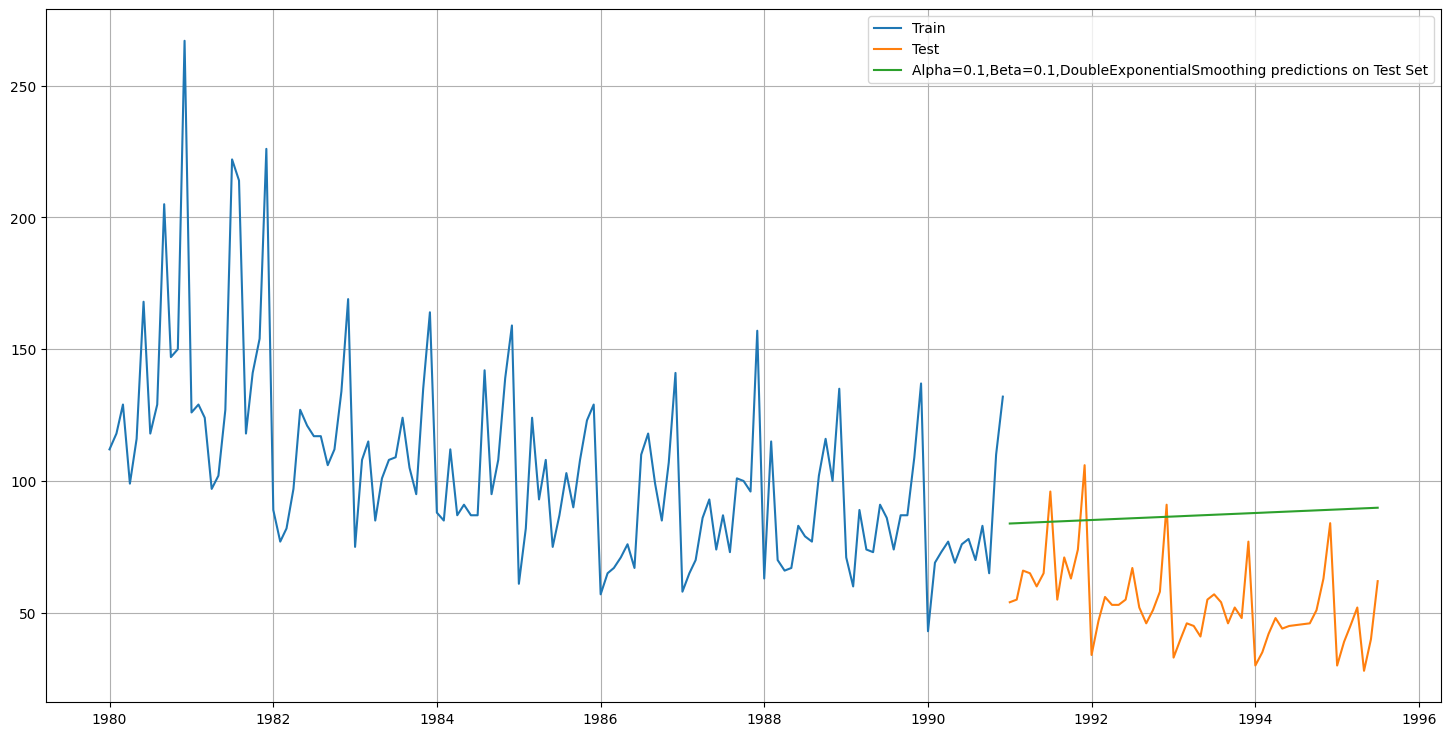

In [ ]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(DES_train['Rose'], label='Train')
plt.plot(DES_test['Rose'], label='Test')

plt.plot(DES_test['predict', 0.1, 0.1], label='Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [ ]:
resultsDf_6.sort_values(by=['Test RMSE']).head()

Alpha Values  Beta Values  Train RMSE  Test RMSE
0            0.1          0.1   34.439111  36.923416
1            0.1          0.2   33.450729  48.688648
10           0.2          0.1   33.097427  65.731702
2            0.1          0.3   33.145789  78.156641
20           0.3          0.1   33.611269  98.653317

In [ ]:
resultsDf_6_1 = pd.DataFrame({'Test RMSE': [resultsDf_6.sort_values(by=['Test RMSE']).values[0][3]]}
                           ,index=['Alpha Value = 0.1, beta value = 0.1, DoubleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_6_1])
resultsDf

Test RMSE
Linear Regression                                   15.268955
NaiveModel                                          79.718773
SimpleAverageModel                                  53.460570
2pointTrailingMovingAverage                         11.529278
4pointTrailingMovingAverage                         14.451403
6pointTrailingMovingAverage                         14.566327
9pointTrailingMovingAverage                         14.727630
Alpha=0.1,SimpleExponentialSmoothing                36.828033
Alpha Value = 0.1, beta value = 0.1, DoubleExpo...  36.923416

Triple Exponential

In [ ]:
TES_train = train.copy()
TES_test = test.copy()

In [ ]:
model_TES_ta_sa = ExponentialSmoothing(TES_train['Rose'],trend='additive',seasonal='additive')
model_TES_ta_sm = ExponentialSmoothing(TES_train['Rose'],trend='additive',seasonal='multiplicative')
model_TES_tm_sm = ExponentialSmoothing(TES_train['Rose'],trend='multiplicative',seasonal='multiplicative')
model_TES_tm_sa = ExponentialSmoothing(TES_train['Rose'],trend='multiplicative',seasonal='additive')

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [ ]:
resultsDf_7 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_7

Empty DataFrame
Columns: [Alpha Values, Beta Values, Gamma Values, Train RMSE, Test RMSE]
Index: []

In [ ]:
model_TES_autofit_ta_sa = model_TES_ta_sa.fit(optimized=True)
model_TES_autofit_ta_sm = model_TES_ta_sm.fit(optimized=True)
model_TES_autofit_tm_sm = model_TES_tm_sm.fit(optimized=True)
model_TES_autofit_tm_sa = model_TES_tm_sa.fit(optimized=True)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


In [ ]:
resultsDf_7_2 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_7_2

Empty DataFrame
Columns: [Alpha Values, Beta Values, Gamma Values, Train RMSE, Test RMSE]
Index: []

In [ ]:
model_TES_autofit_ta_sa.params

{'smoothing_level': 0.08491574907842013,
 'smoothing_trend': 5.5205494088745035e-06,
 'smoothing_seasonal': 0.0005477182208247348,
 'damping_trend': nan,
 'initial_level': 147.05898703809248,
 'initial_trend': -0.5496981430927392,
 'initial_seasons': array([-31.16021285, -18.81317648, -10.81406896, -21.41413199,
        -12.6036696 ,  -7.23553106,   2.76744902,   8.85548059,
          4.83969803,   2.95125217,  21.07934859,  63.31472515]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [ ]:
model_TES_autofit_ta_sm.params

{'smoothing_level': 0.07736040004765096,
 'smoothing_trend': 0.03936496779735522,
 'smoothing_seasonal': 0.0008375039104357999,
 'damping_trend': nan,
 'initial_level': 156.90674503596637,
 'initial_trend': -0.9061396720042346,
 'initial_seasons': array([0.7142168 , 0.80982439, 0.88543128, 0.77363782, 0.87046319,
        0.94699283, 1.04196135, 1.11012703, 1.04835489, 1.0276963 ,
        1.19783562, 1.6514144 ]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [ ]:
model_TES_autofit_tm_sm.params

{'smoothing_level': 0.053527754869099636,
 'smoothing_trend': 0.03326784064001227,
 'smoothing_seasonal': 1.1369165069859105e-05,
 'damping_trend': nan,
 'initial_level': 114.21180446123547,
 'initial_trend': 0.9923631726352484,
 'initial_seasons': array([0.99382377, 1.12786066, 1.23494689, 1.07812886, 1.21324338,
        1.31945262, 1.44982009, 1.54564845, 1.4653871 , 1.43209206,
        1.67215844, 2.30190104]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [ ]:
model_TES_autofit_tm_sa.params

{'smoothing_level': 0.14642857142857144,
 'smoothing_trend': 0.05324675324675325,
 'smoothing_seasonal': 0.13131868131868132,
 'damping_trend': nan,
 'initial_level': 145.27499999999992,
 'initial_trend': 1.0052617032482805,
 'initial_seasons': array([-30.484375  , -25.046875  , -15.53645833, -30.734375  ,
        -16.46354167,  -9.72395833,  12.44270833,  17.53645833,
          5.55729167,  -3.890625  ,  15.99479167,  80.34895833]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [ ]:
TES_test['predict_ta_sa'] = model_TES_autofit_ta_sa.forecast(steps=len(test))
TES_test.head()

Rose  predict_ta_sa
YearMonth                      
1991-01-01  54.0      42.574560
1991-02-01  55.0      54.372099
1991-03-01  66.0      61.821511
1991-04-01  65.0      50.671639
1991-05-01  60.0      58.932400

In [ ]:
TES_test['predict_ta_sm'] = model_TES_autofit_ta_sm.forecast(steps=len(test))
TES_test.head()

Rose  predict_ta_sa  predict_ta_sm
YearMonth                                     
1991-01-01  54.0      42.574560      55.942246
1991-02-01  55.0      54.372099      63.240624
1991-03-01  66.0      61.821511      68.899674
1991-04-01  65.0      50.671639      60.007486
1991-05-01  60.0      58.932400      67.257150

In [ ]:
TES_test['predict_tm_sm'] = model_TES_autofit_tm_sm.forecast(steps=len(test))
TES_test.head()

Rose  predict_ta_sa  predict_ta_sm  predict_tm_sm
YearMonth                                                    
1991-01-01  54.0      42.574560      55.942246      55.753580
1991-02-01  55.0      54.372099      63.240624      63.084055
1991-03-01  66.0      61.821511      68.899674      68.866825
1991-04-01  65.0      50.671639      60.007486      59.942156
1991-05-01  60.0      58.932400      67.257150      67.252072

In [ ]:
TES_test['predict_tm_sa'] = model_TES_autofit_tm_sa.forecast(steps=len(test))
TES_test.head()

Rose  predict_ta_sa  predict_ta_sm  predict_tm_sm  predict_tm_sa
YearMonth                                                                   
1991-01-01  54.0      42.574560      55.942246      55.753580      46.284930
1991-02-01  55.0      54.372099      63.240624      63.084055      58.354810
1991-03-01  66.0      61.821511      68.899674      68.866825      64.361205
1991-04-01  65.0      50.671639      60.007486      59.942156      54.433907
1991-05-01  60.0      58.932400      67.257150      67.252072      60.002489

In [ ]:
rmse_model_temp_ta_sa = metrics.mean_squared_error(TES_test['Rose'],TES_test['predict_ta_sa'],squared=False)
print("For Alpha =0.08621, Beta = 1.3722, Gamma = 0.4763 Tripple Exponential Smoothing Model (Trend = Additive, Seasonality = Additive) forecast on the Test Data, RMSE is %3.3f"
      %(rmse_model_temp_ta_sa))

## Test Data

rmse_model_temp_ta_sm = metrics.mean_squared_error(TES_test['Rose'],TES_test['predict_ta_sm'],squared=False)
print("For Alpha =0.1542, Beta = 5.3100, Gamma = 0.3713 Tripple Exponential Smoothing Model (Trend = Additive, Seasonality = Multiplicative) forecast on the Test Data, RMSE is %3.3f"
      %(rmse_model_temp_ta_sm))

## Test Data

rmse_model_temp_tm_sm = metrics.mean_squared_error(TES_test['Rose'],TES_test['predict_tm_sm'],squared=False)
print("For Alpha =0.1531, Beta = 1.3401, Gamma = 0.3691 Tripple Exponential Smoothing Model (Trend = Multiplicative, Seasonality = Multiplicative) forecast on the Test Data, RMSE is %3.3f"
      %(rmse_model_temp_tm_sm))

## Test Data

rmse_model_temp_tm_sa = metrics.mean_squared_error(TES_test['Rose'],TES_test['predict_tm_sa'],squared=False)
print("For Alpha =0.0831, Beta = 7.8624, Gamma = 0.4910 Tripple Exponential Smoothing Model (Trend = Multiplicative, Seasonality = Additive) forecast on the Test Data, RMSE is %3.3f"
      %(rmse_model_temp_tm_sa))

For Alpha =0.08621, Beta = 1.3722, Gamma = 0.4763 Tripple Exponential Smoothing Model (Trend = Additive, Seasonality = Additive) forecast on the Test Data, RMSE is 14.243
For Alpha =0.1542, Beta = 5.3100, Gamma = 0.3713 Tripple Exponential Smoothing Model (Trend = Additive, Seasonality = Multiplicative) forecast on the Test Data, RMSE is 19.113
For Alpha =0.1531, Beta = 1.3401, Gamma = 0.3691 Tripple Exponential Smoothing Model (Trend = Multiplicative, Seasonality = Multiplicative) forecast on the Test Data, RMSE is 20.326
For Alpha =0.0831, Beta = 7.8624, Gamma = 0.4910 Tripple Exponential Smoothing Model (Trend = Multiplicative, Seasonality = Additive) forecast on the Test Data, RMSE is 16.529


In [ ]:
resultsDf_temp = pd.DataFrame({'Test RMSE': rmse_model_temp}
                           ,index=['Alpha=0.08621,Beta=1.3722,Gamma=0.4763,TrippleExponentialSmoothing_Auto_Fit'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

Test RMSE
Linear Regression                                   15.268955
NaiveModel                                          79.718773
SimpleAverageModel                                  53.460570
2pointTrailingMovingAverage                         11.529278
4pointTrailingMovingAverage                         14.451403
6pointTrailingMovingAverage                         14.566327
9pointTrailingMovingAverage                         14.727630
Alpha=0.1,SimpleExponentialSmoothing                36.828033
Alpha Value = 0.1, beta value = 0.1, DoubleExpo...  36.923416
Alpha=0.08621,Beta=1.3722,Gamma=0.4763,TrippleE...  37.592212

In [ ]:
TES_train = train.copy()
TES_test = test.copy()
del resultsDf_7_2

## First we will define an empty dataframe to store our values from the loop

resultsDf_7_2 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Train RMSE':[],'Test RMSE': [],
                             'Method' : []})
resultsDf_7_2

Empty DataFrame
Columns: [Alpha Values, Beta Values, Gamma Values, Train RMSE, Test RMSE, Method]
Index: []

In [ ]:
for i in np.arange(0.1,1.1,0.1):
    for j in np.arange(0.1,1.1,0.1):
        for k in np.arange(0.1,1.1,0.1):
            model_TES_alpha_i_j_k = model_TES_ta_sa.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
            TES_train['predict_ta_sa',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
            TES_test['predict_ta_sa',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))

            rmse_model7_train = metrics.mean_squared_error(TES_train['Rose'],TES_train['predict_ta_sa',i,j,k],squared=False)

            rmse_model7_test = metrics.mean_squared_error(TES_test['Rose'],TES_test['predict_ta_sa',i,j,k].replace(np.inf,0).replace(np.nan,0).dropna(),squared=False)

            resultsDf_7_2 = resultsDf_7_2.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
                                                  'Train RMSE':rmse_model7_train,'Test RMSE':rmse_model7_test, 'Method':'ta_sa'}
                                                 , ignore_index=True)

Streaming output truncated to the last 5000 lines.
<ipython-input-298-3b368df970a5>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model_TES_alpha_i_j_k = model_TES_ta_sa.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
<ipython-input-298-3b368df970a5>:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict_ta_sa',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
<ipython-input-298-3b368df970a5>:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = fr

In [ ]:
for i in np.arange(0.1,1.1,0.1):
    for j in np.arange(0.1,1.1,0.1):
        for k in np.arange(0.1,1.1,0.1):
            model_TES_alpha_i_j_k = model_TES_ta_sm.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
            TES_train['predict_ta_sm',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
            TES_test['predict_ta_sm',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))

            rmse_model7_train = metrics.mean_squared_error(TES_train['Rose'],TES_train['predict_ta_sm',i,j,k],squared=False)

            rmse_model7_test = metrics.mean_squared_error(TES_test['Rose'],TES_test['predict_ta_sm',i,j,k].replace(np.inf,0).replace(np.nan,0).dropna(),squared=False)

            resultsDf_7_2 = resultsDf_7_2.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
                                                  'Train RMSE':rmse_model7_train,'Test RMSE':rmse_model7_test, 'Method':'ta_sm'}
                                                 , ignore_index=True)

Streaming output truncated to the last 5000 lines.
<ipython-input-299-1dc625166288>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model_TES_alpha_i_j_k = model_TES_ta_sm.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
<ipython-input-299-1dc625166288>:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict_ta_sm',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
<ipython-input-299-1dc625166288>:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = fr

In [ ]:
for i in np.arange(0.1,1.0,0.1):
    for j in np.arange(0.1,1.0,0.1):
        for k in np.arange(0.1,1.0,0.1):
            model_TES_alpha_i_j_k = model_TES_tm_sm.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
            TES_train['predict_tm_sm',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
            TES_test['predict_tm_sm',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))

            rmse_model7_train = metrics.mean_squared_error(TES_train['Rose'],TES_train['predict_tm_sm',i,j,k],squared=False)

            rmse_model7_test = metrics.mean_squared_error(TES_test['Rose'],TES_test['predict_tm_sm',i,j,k].replace(np.inf,0).replace(np.nan,0).dropna(),squared=False)

            resultsDf_7_2 = resultsDf_7_2.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
                                                  'Train RMSE':rmse_model7_train,'Test RMSE':rmse_model7_test, 'Method':'tm_sm'}
                                                 , ignore_index=True)

Streaming output truncated to the last 5000 lines.
<ipython-input-300-a9029d04b8cf>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model_TES_alpha_i_j_k = model_TES_tm_sm.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
<ipython-input-300-a9029d04b8cf>:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict_tm_sm',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
<ipython-input-300-a9029d04b8cf>:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = fr

In [ ]:
for i in np.arange(0.1,1.0,0.1):
    for j in np.arange(0.1,1.0,0.1):
        for k in np.arange(0.1,1.0,0.1):
            model_TES_alpha_i_j_k = model_TES_tm_sa.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
            TES_train['predict_tm_sa',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
            TES_test['predict_tm_sa',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))

            rmse_model7_train = metrics.mean_squared_error(TES_train['Rose'],TES_train['predict_tm_sa',i,j,k],squared=False)

            rmse_model7_test = metrics.mean_squared_error(TES_test['Rose'],TES_test['predict_tm_sa',i,j,k].replace(np.inf,0).replace(np.nan,0).dropna(),squared=False)

            resultsDf_7_2 = resultsDf_7_2.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
                                                  'Train RMSE':rmse_model7_train,'Test RMSE':rmse_model7_test, 'Method':'tm_sa'}
                                                 , ignore_index=True)

Streaming output truncated to the last 5000 lines.
<ipython-input-301-6f5237074d62>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model_TES_alpha_i_j_k = model_TES_tm_sa.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
<ipython-input-301-6f5237074d62>:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict_tm_sa',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
<ipython-input-301-6f5237074d62>:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = fr

In [ ]:
TES_test.head()

Rose  (predict_ta_sa, 0.1, 0.1, 0.1)  \
YearMonth                                          
1991-01-01  54.0                       45.711834   
1991-02-01  55.0                       56.369270   
1991-03-01  66.0                       63.004762   
1991-04-01  65.0                       51.663022   
1991-05-01  60.0                       58.931424   

            (predict_ta_sa, 0.1, 0.1, 0.2)  \
YearMonth                                    
1991-01-01                       46.537302   
1991-02-01                       60.659980   
1991-03-01                       65.794341   
1991-04-01                       58.369250   
1991-05-01                       61.246579   

            (predict_ta_sa, 0.1, 0.1, 0.30000000000000004)  \
YearMonth                                                    
1991-01-01                                       46.559436   
1991-02-01                                       62.645947   
1991-03-01                                       66.979401   
1991-04-01                                       62.190538   
1991-05-01                                       62.077338   

            (predict_ta_sa, 0.1, 0.1, 0.4)  (predict_ta_sa, 0.1, 0.1, 0.5)  \
YearMonth                                                                    
1991-01-01                       46.071952                       45.225493   
1991-02-01                       63.356292                       63.447907   
1991-03-01                       67.649481                       68.330584   
1991-04-01                       64.397061                       65.989684   
1991-05-01                       62.127541                       62.025325   

            (predict_ta_sa, 0.1, 0.1, 0.6)  \
YearMonth                                    
1991-01-01                       44.012323   
1991-02-01                       63.255359   
1991-03-01                       69.025477   
1991-04-01                       67.481555   
1991-05-01                       62.111373   

            (predict_ta_sa, 0.1, 0.1, 0.7000000000000001)  \
YearMonth                                                   
1991-01-01                                      42.371394   
1991-02-01                                      62.959944   
1991-03-01                                      69.443834   
1991-04-01                                      68.978770   
1991-05-01                                      62.439476   

            (predict_ta_sa, 0.1, 0.1, 0.8)  (predict_ta_sa, 0.1, 0.1, 0.9)  \
YearMonth                                                                    
1991-01-01                       40.270548                       37.733092   
1991-02-01                       62.730215                       62.790704   
1991-03-01                       69.226438                       68.082415   
1991-04-01                       70.340273                       71.319231   
1991-05-01                       62.865829                       63.150672   

            ...  (predict_tm_sa, 0.9, 0.8, 0.9)  \
YearMonth   ...                                   
1991-01-01  ...                    3.735952e+33   
1991-02-01  ...                    7.148786e+32   
1991-03-01  ...                    1.357303e+32   
1991-04-01  ...                    2.576482e+31   
1991-05-01  ...                   -1.230813e+29   

            (predict_tm_sa, 0.9, 0.9, 0.1)  (predict_tm_sa, 0.9, 0.9, 0.2)  \
YearMonth                                                                    
1991-01-01                       49.121533                       76.518424   
1991-02-01                       37.090349                       76.114781   
1991-03-01                       15.196663                       47.008485   
1991-04-01                       -2.515265                        9.602428   
1991-05-01                       -1.476818                       -5.631953   

            (predict_tm_sa, 0.9, 0.9, 0.30000000000000004)  \
YearMonth                                                    
1991-01-01     

In [ ]:
resultsDf_7_2.sort_values(by=['Test RMSE']).head()

Alpha Values  Beta Values  Gamma Values  Train RMSE  Test RMSE Method
2136           0.2          0.7           0.2   24.042290   8.702460  tm_sm
1010           0.1          0.2           0.1   19.770392   9.223504  ta_sm
1011           0.1          0.2           0.2   20.253487   9.496152  ta_sm
1151           0.2          0.6           0.2   23.129850   9.565988  ta_sm
1012           0.1          0.2           0.3   20.871304   9.888106  ta_sm

In [ ]:
resultsDf_7_3 = pd.DataFrame({'Test RMSE': [resultsDf_7_2.sort_values(by=['Test RMSE']).values[0][4]]}
                           ,index=['Alpha=0.2,Beta=0.7,Gamma=0.2,TripleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_7_3])
resultsDf

Test RMSE
Linear Regression                                   15.268955
NaiveModel                                          79.718773
SimpleAverageModel                                  53.460570
2pointTrailingMovingAverage                         11.529278
4pointTrailingMovingAverage                         14.451403
6pointTrailingMovingAverage                         14.566327
9pointTrailingMovingAverage                         14.727630
Alpha=0.1,SimpleExponentialSmoothing                36.828033
Alpha Value = 0.1, beta value = 0.1, DoubleExpo...  36.923416
Alpha=0.08621,Beta=1.3722,Gamma=0.4763,TrippleE...  37.592212
Alpha=0.2,Beta=0.7,Gamma=0.2,TripleExponentialS...   8.702460

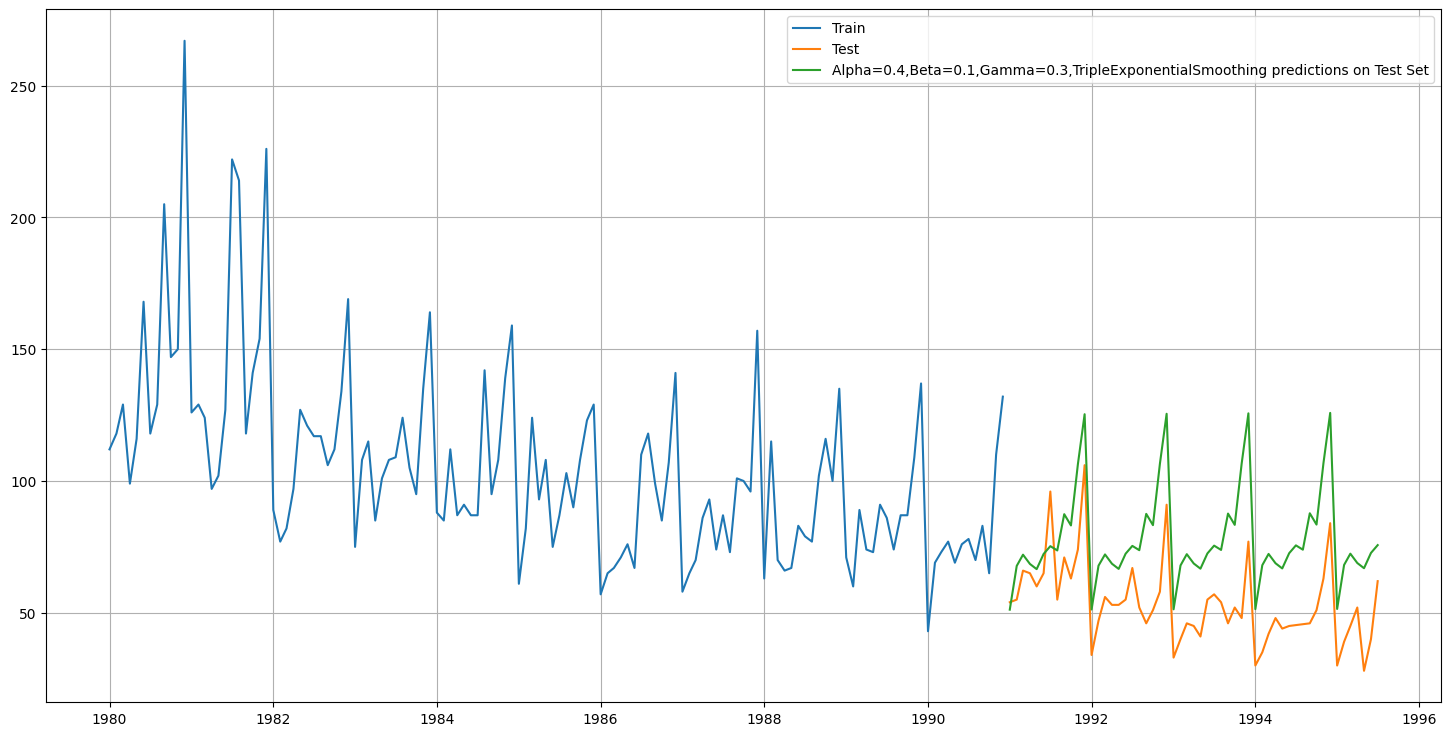

In [ ]:
plt.figure(figsize=(18,9))
plt.plot(TES_train['Rose'], label='Train')
plt.plot(TES_test['Rose'], label='Test')

#The value of alpha and beta is taken like that by python
plt.plot(TES_test['predict_tm_sm', 0.4, 0.1, 0.30000000000000004],
         label='Alpha=0.4,Beta=0.1,Gamma=0.3,TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

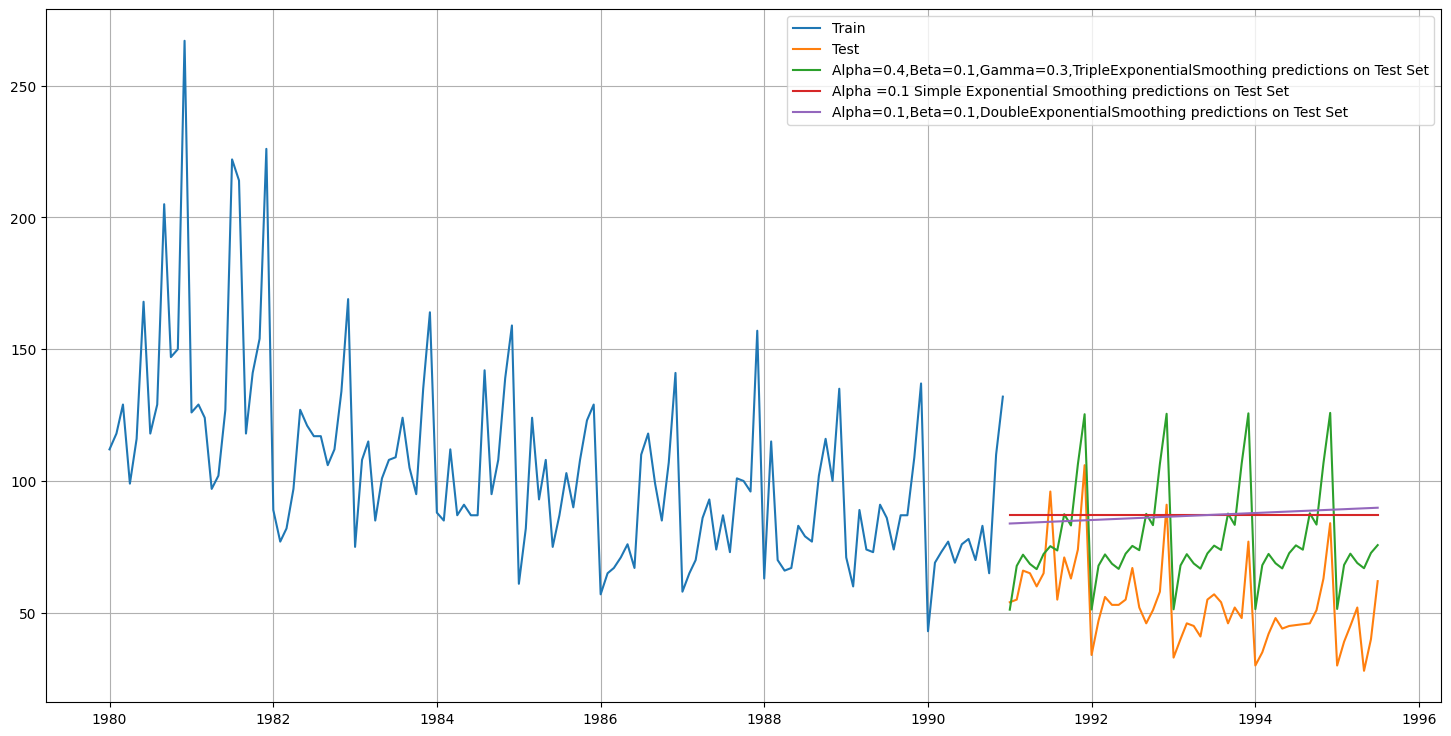

In [ ]:
plt.figure(figsize=(18,9))
plt.plot(TES_train['Rose'], label='Train')
plt.plot(TES_test['Rose'], label='Test')

#The value of alpha and beta is taken like that by python
plt.plot(TES_test['predict_tm_sm', 0.4, 0.1, 0.30000000000000004],
         label='Alpha=0.4,Beta=0.1,Gamma=0.3,TripleExponentialSmoothing predictions on Test Set')
plt.plot(SES_test['predict', 0.1], label='Alpha =0.1 Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_test['predict', 0.1, 0.1], label='Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid();

1.5 Check for the stationarity of the data on which the model is being built on using appropriate statistical tests and also mention the hypothesis for the statistical test. If the data is found to be non-stationary, take appropriate steps to make it stationary. Check the new data for stationarity and comment. Note: Stationarity should be checked at alpha = 0.05

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
import sys
import warnings
import itertools
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
## Test for stationarity of the series - Dicky Fuller test

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):

    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean() #determining the rolling mean
    rolstd = timeseries.rolling(window=7).std()   #determining the rolling standard deviation

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

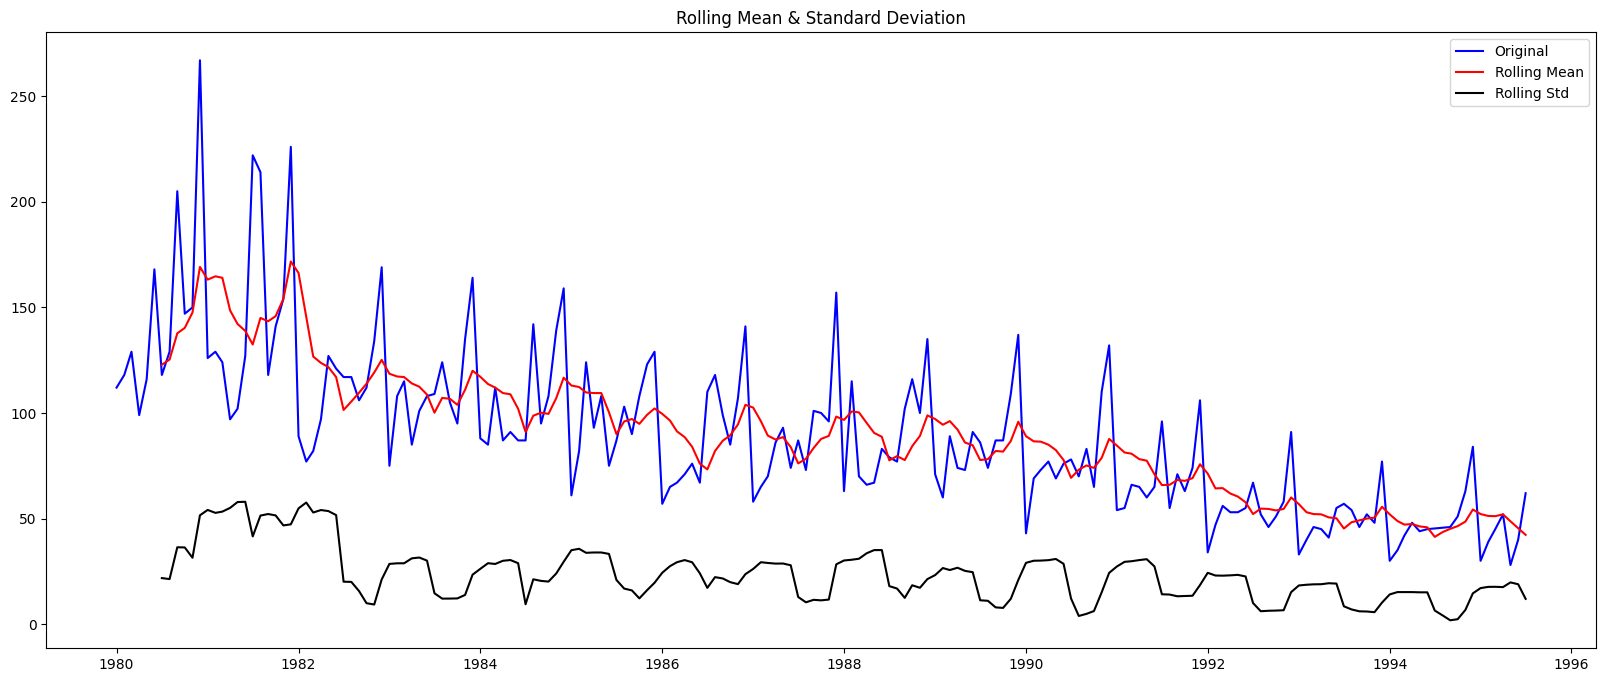

Results of Dickey-Fuller Test:
Test Statistic                  -1.876699
p-value                          0.343101
#Lags Used                      13.000000
Number of Observations Used    173.000000
Critical Value (1%)             -3.468726
Critical Value (5%)             -2.878396
Critical Value (10%)            -2.575756
dtype: float64 



In [ ]:
test_stationarity(df['Rose'])


We see that at 5% significant level the Time Series is non-stationary.

Let us take a difference of order 1 and check whether the Time Series is stationary or not.

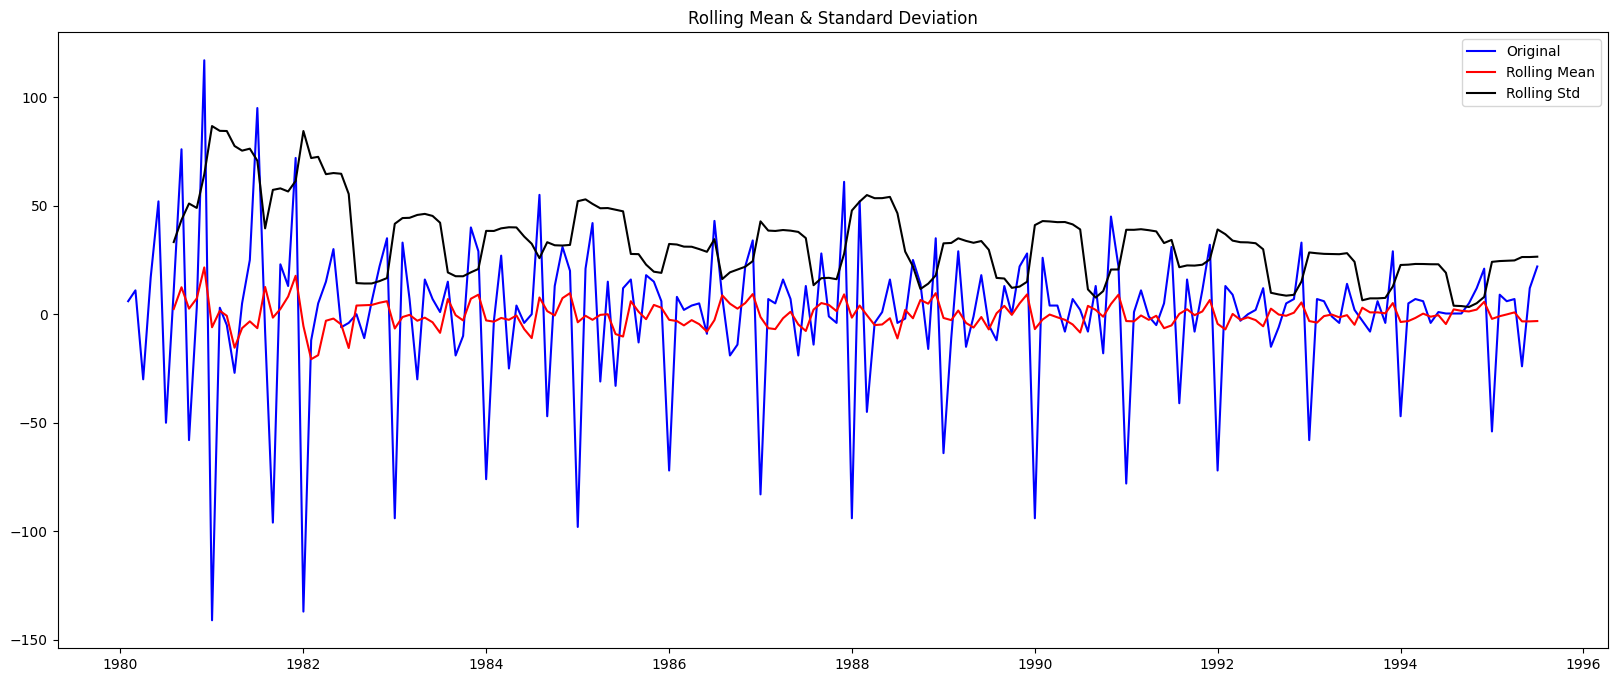

Results of Dickey-Fuller Test:
Test Statistic                -8.044392e+00
p-value                        1.810895e-12
#Lags Used                     1.200000e+01
Number of Observations Used    1.730000e+02
Critical Value (1%)           -3.468726e+00
Critical Value (5%)           -2.878396e+00
Critical Value (10%)          -2.575756e+00
dtype: float64 



In [ ]:
test_stationarity(df['Rose'].diff().dropna())

We see that at α = 0.05 the Time Series is indeed stationary.

1.6 Build an automated version of the ARIMA/SARIMA model in which the parameters are selected using the lowest Akaike Information Criteria (AIC) on the training data and evaluate this model on the test data using RMSE.

In [ ]:
import itertools
p = q = range(0, 4)
d= range(1,2) #since series is stationary at d=1
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (0, 1, 3)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (1, 1, 3)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)
Model: (2, 1, 3)
Model: (3, 1, 0)
Model: (3, 1, 1)
Model: (3, 1, 2)
Model: (3, 1, 3)


In [ ]:
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

Empty DataFrame
Columns: [param, AIC]
Index: []

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

for param in pdq:
    ARIMA_model = ARIMA(train['Rose'].values,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)

ARIMA(0, 1, 0) - AIC:1333.1546729124348
ARIMA(0, 1, 1) - AIC:1282.309831974832
ARIMA(0, 1, 2) - AIC:1279.6715288535784
ARIMA(0, 1, 3) - AIC:1280.545376173466
ARIMA(1, 1, 0) - AIC:1317.350310538146
ARIMA(1, 1, 1) - AIC:1280.5742295380046
ARIMA(1, 1, 2) - AIC:1279.8707234231929
ARIMA(1, 1, 3) - AIC:1281.8707223309984
ARIMA(2, 1, 0) - AIC:1298.6110341604945
ARIMA(2, 1, 1) - AIC:1281.5078621868563
ARIMA(2, 1, 2) - AIC:1281.870722226456
ARIMA(2, 1, 3) - AIC:1274.6951271827177
ARIMA(3, 1, 0) - AIC:1297.481091727167
ARIMA(3, 1, 1) - AIC:1282.4192776271927
ARIMA(3, 1, 2) - AIC:1283.7207405977094
ARIMA(3, 1, 3) - AIC:1278.6580044819445


In [ ]:
ARIMA_AIC.sort_values(by='AIC',ascending=True)

param          AIC
11  (2, 1, 3)  1274.695127
15  (3, 1, 3)  1278.658004
2   (0, 1, 2)  1279.671529
6   (1, 1, 2)  1279.870723
3   (0, 1, 3)  1280.545376
5   (1, 1, 1)  1280.574230
9   (2, 1, 1)  1281.507862
10  (2, 1, 2)  1281.870722
7   (1, 1, 3)  1281.870722
1   (0, 1, 1)  1282.309832
13  (3, 1, 1)  1282.419278
14  (3, 1, 2)  1283.720741
12  (3, 1, 0)  1297.481092
8   (2, 1, 0)  1298.611034
4   (1, 1, 0)  1317.350311
0   (0, 1, 0)  1333.154673

In [ ]:
auto_ARIMA = ARIMA(train['Rose'], order=(2,1,3))

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:                   Rose   No. Observations:                  132
Model:                 ARIMA(2, 1, 3)   Log Likelihood                -631.348
Date:                Sat, 24 Feb 2024   AIC                           1274.695
Time:                        18:43:34   BIC                           1291.946
Sample:                    01-01-1980   HQIC                          1281.705
                         - 12-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.6779      0.084    -20.034      0.000      -1.842      -1.514
ar.L2         -0.7288      0.084     -8.702      0.000      -0.893      -0.565
ma.L1          1.0447      0.644      1.622      0.1

In [ ]:
# Prediction rsme
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test))

rmse = mean_squared_error(test['Rose'], predicted_auto_ARIMA.tolist(), squared=False)
print(rmse)

36.815186018493684


In [ ]:
results = pd.DataFrame({'Test RMSE': rmse}
                           ,index=['Auto_ARIMA'])

resultsDf = pd.concat([resultsDf, results])
resultsDf

Test RMSE
Linear Regression                                   15.268955
NaiveModel                                          79.718773
SimpleAverageModel                                  53.460570
2pointTrailingMovingAverage                         11.529278
4pointTrailingMovingAverage                         14.451403
6pointTrailingMovingAverage                         14.566327
9pointTrailingMovingAverage                         14.727630
Alpha=0.1,SimpleExponentialSmoothing                36.828033
Alpha Value = 0.1, beta value = 0.1, DoubleExpo...  36.923416
Alpha=0.08621,Beta=1.3722,Gamma=0.4763,TrippleE...  37.592212
Alpha=0.2,Beta=0.7,Gamma=0.2,TripleExponentialS...   8.702460
Auto_ARIMA                                          36.815186

SARIMA

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [ ]:
import itertools
p = q = range(0, 4)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (0, 1, 3)(0, 0, 3, 12)
Model: (1, 1, 0)(1, 0, 0, 12)
Model: (1, 1, 1)(1, 0, 1, 12)
Model: (1, 1, 2)(1, 0, 2, 12)
Model: (1, 1, 3)(1, 0, 3, 12)
Model: (2, 1, 0)(2, 0, 0, 12)
Model: (2, 1, 1)(2, 0, 1, 12)
Model: (2, 1, 2)(2, 0, 2, 12)
Model: (2, 1, 3)(2, 0, 3, 12)
Model: (3, 1, 0)(3, 0, 0, 12)
Model: (3, 1, 1)(3, 0, 1, 12)
Model: (3, 1, 2)(3, 0, 2, 12)
Model: (3, 1, 3)(3, 0, 3, 12)


In [ ]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Rose'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:1323.9657875279158
SARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:1145.4230827207298
SARIMA(0, 1, 0)x(0, 0, 2, 12) - AIC:976.4375296380895
SARIMA(0, 1, 0)x(0, 0, 3, 12) - AIC:3537.579168905919
SARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:1139.921738995602
SARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:1116.0207869386172
SARIMA(0, 1, 0)x(1, 0, 2, 12) - AIC:969.691363575225
SARIMA(0, 1, 0)x(1, 0, 3, 12) - AIC:4554.32909051064
SARIMA(0, 1, 0)x(2, 0, 0, 12) - AIC:960.8812220353041
SARIMA(0, 1, 0)x(2, 0, 1, 12) - AIC:962.8794540697556
SARIMA(0, 1, 0)x(2, 0, 2, 12) - AIC:955.5735408945757
SARIMA(0, 1, 0)x(2, 0, 3, 12) - AIC:4397.822817992214
SARIMA(0, 1, 0)x(3, 0, 0, 12) - AIC:850.7535403931095
SARIMA(0, 1, 0)x(3, 0, 1, 12) - AIC:851.7482702748039
SARIMA(0, 1, 0)x(3, 0, 2, 12) - AIC:850.53041361288
SARIMA(0, 1, 0)x(3, 0, 3, 12) - AIC:3467.855628476979
SARIMA(0, 1, 1)x(0, 0, 0, 12) - AIC:1263.5369097383966
SARIMA(0, 1, 1)x(0, 0, 1, 12) - AIC:1098.5554825918337
SARIMA(0, 1, 1)x(0, 0, 2, 1

In [ ]:
SARIMA_AIC.sort_values(by=['AIC']).head()

param       seasonal         AIC
222  (3, 1, 1)  (3, 0, 2, 12)  774.400287
238  (3, 1, 2)  (3, 0, 2, 12)  774.880936
220  (3, 1, 1)  (3, 0, 0, 12)  775.426699
221  (3, 1, 1)  (3, 0, 1, 12)  775.495330
252  (3, 1, 3)  (3, 0, 0, 12)  775.561018

In [ ]:
auto_SARIMA_6 = sm.tsa.statespace.SARIMAX(train['Rose'].values,
                                order=(3, 1, 1),
                                seasonal_order=(3, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_6 = auto_SARIMA_6.fit(maxiter=1000)
print(results_auto_SARIMA_6.summary())

                                        SARIMAX Results                                        
Dep. Variable:                                       y   No. Observations:                  132
Model:             SARIMAX(3, 1, 1)x(3, 0, [1, 2], 12)   Log Likelihood                -377.200
Date:                                 Sat, 24 Feb 2024   AIC                            774.400
Time:                                         18:53:19   BIC                            799.618
Sample:                                              0   HQIC                           784.578
                                                 - 132                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0464      0.126      0.367      0.714      -0.201       0

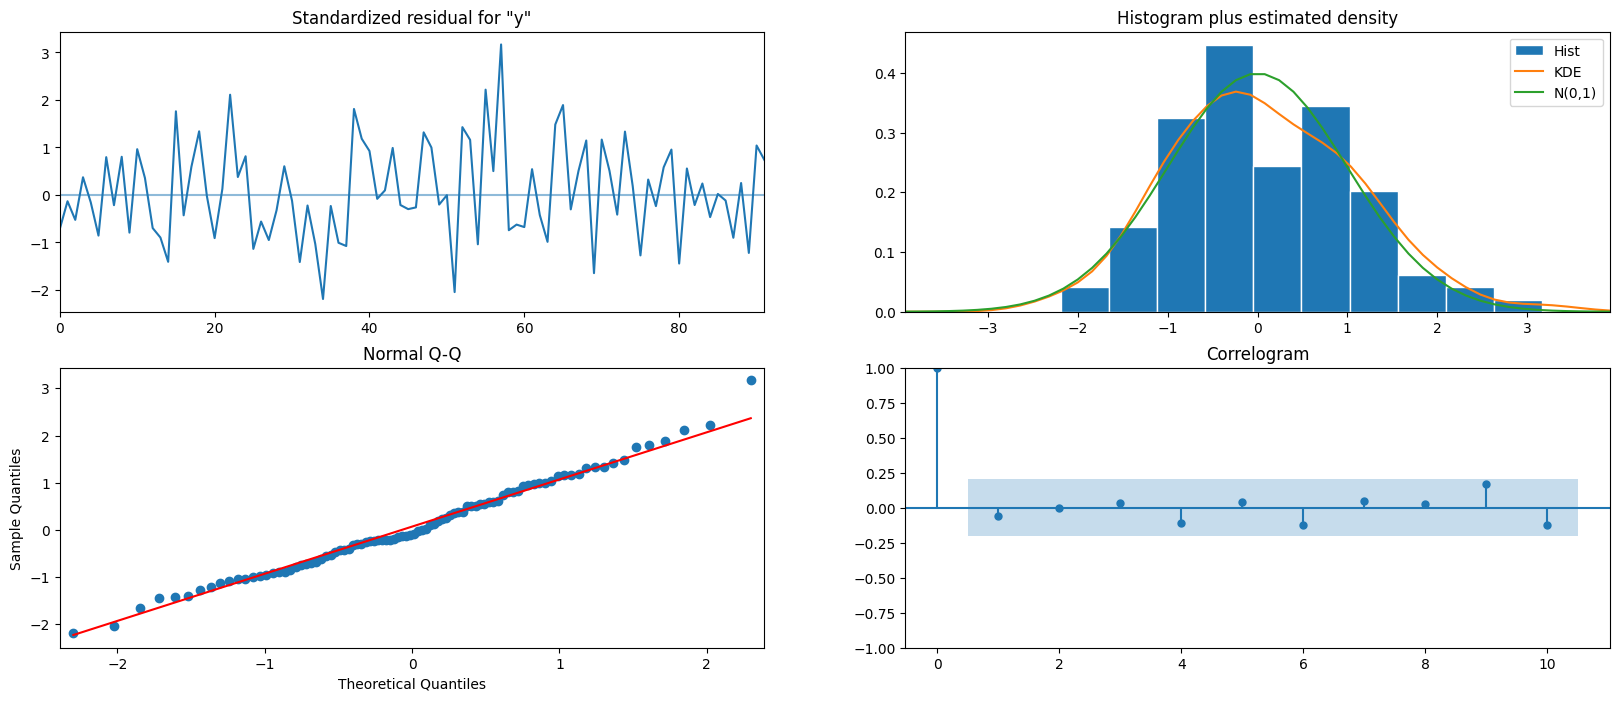

In [ ]:
results_auto_SARIMA_6.plot_diagnostics()
plt.show()

In [ ]:
predicted_auto_SARIMA_6 = results_auto_SARIMA_6.get_forecast(steps=len(test))
predicted_auto_SARIMA_6.summary_frame(alpha=0.05).head()

y       mean    mean_se  mean_ci_lower  mean_ci_upper
0  55.237188  13.907058      27.979855      82.494520
1  68.122541  13.990531      40.701604      95.543478
2  67.909380  14.011597      40.447154      95.371605
3  66.786145  14.098878      39.152852      94.419438
4  69.761986  14.108245      42.110334      97.413638

In [ ]:
rmse = mean_squared_error(test['Rose'],predicted_auto_SARIMA_6.predicted_mean,squared=False)
print(rmse)

18.88214562725671


In [ ]:
resultsDf_9_1 = pd.DataFrame({'Test RMSE': rmse}
                           ,index=['(3,1,1),(3,0,2,12),Auto_SARIMA'])

resultsDf = pd.concat([resultsDf, resultsDf_9_1])
resultsDf

Test RMSE
Linear Regression                                   15.268955
NaiveModel                                          79.718773
SimpleAverageModel                                  53.460570
2pointTrailingMovingAverage                         11.529278
4pointTrailingMovingAverage                         14.451403
6pointTrailingMovingAverage                         14.566327
9pointTrailingMovingAverage                         14.727630
Alpha=0.1,SimpleExponentialSmoothing                36.828033
Alpha Value = 0.1, beta value = 0.1, DoubleExpo...  36.923416
Alpha=0.08621,Beta=1.3722,Gamma=0.4763,TrippleE...  37.592212
Alpha=0.2,Beta=0.7,Gamma=0.2,TripleExponentialS...   8.702460
Auto_ARIMA                                          36.815186
(3,1,1),(3,0,2,12),Auto_SARIMA                      18.882146

1.7 Build ARIMA/SARIMA models based on the cut-off points of ACF and PACF on the training data and evaluate this model on the test data using RMSE.

Manual ARIMA

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

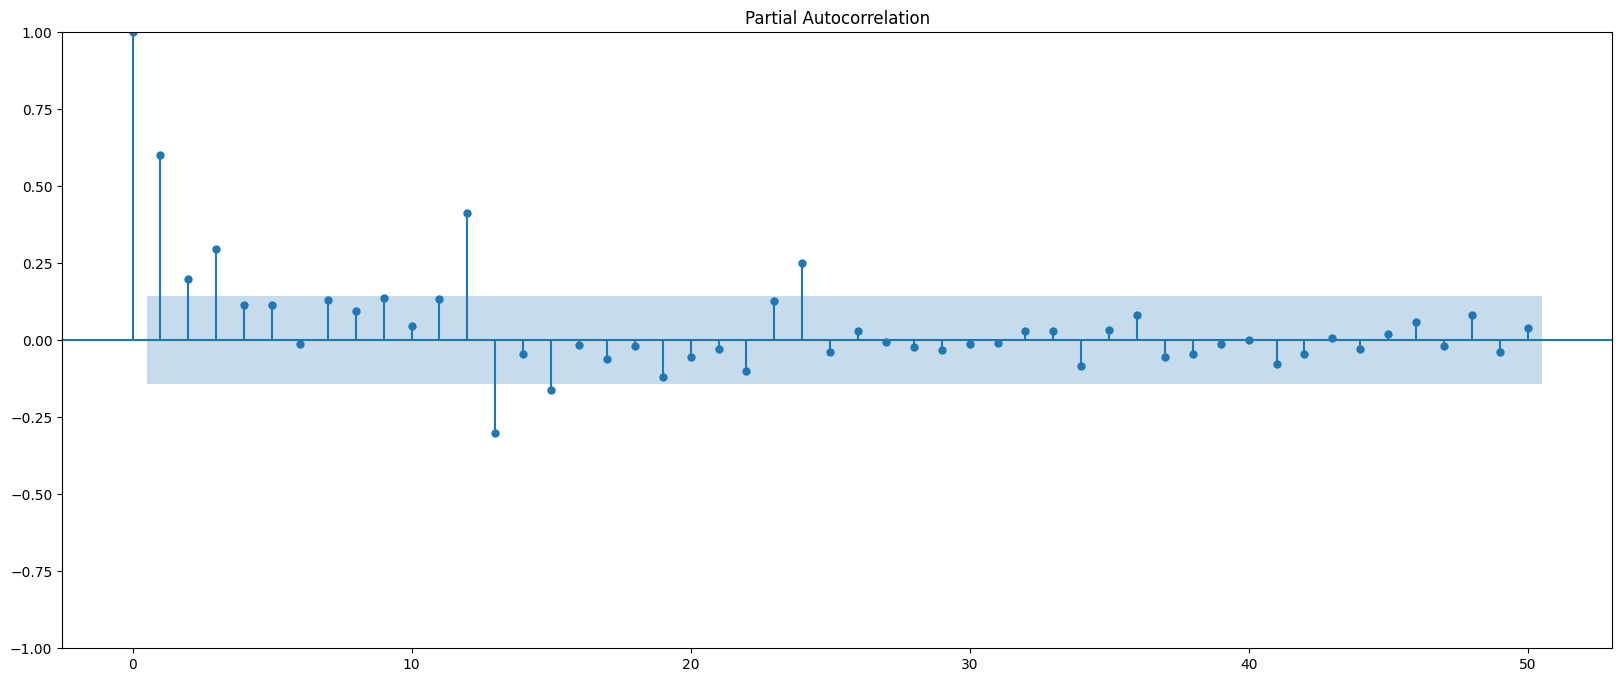

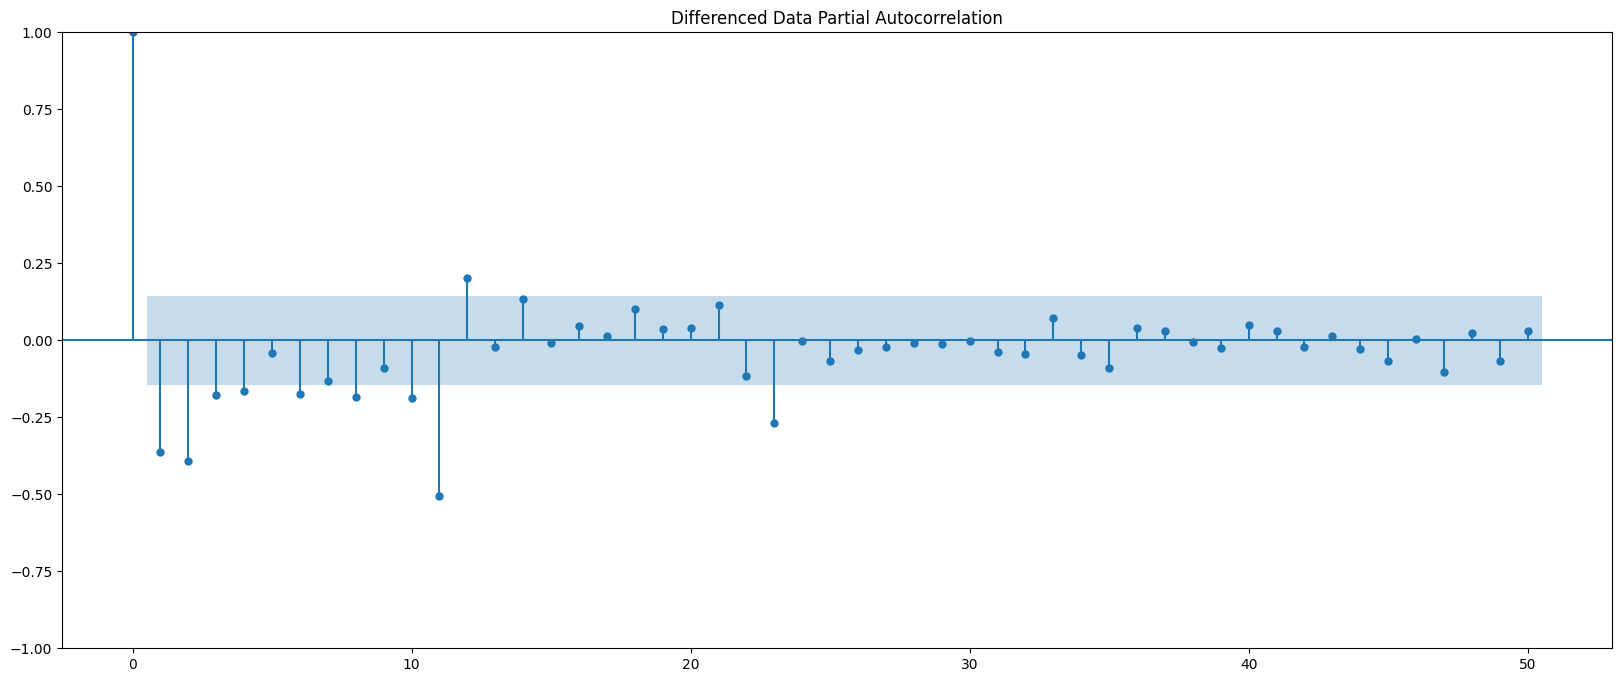

In [ ]:
plot_pacf(df['Rose'],lags=50)
plot_pacf(df['Rose'].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation')
plt.show()

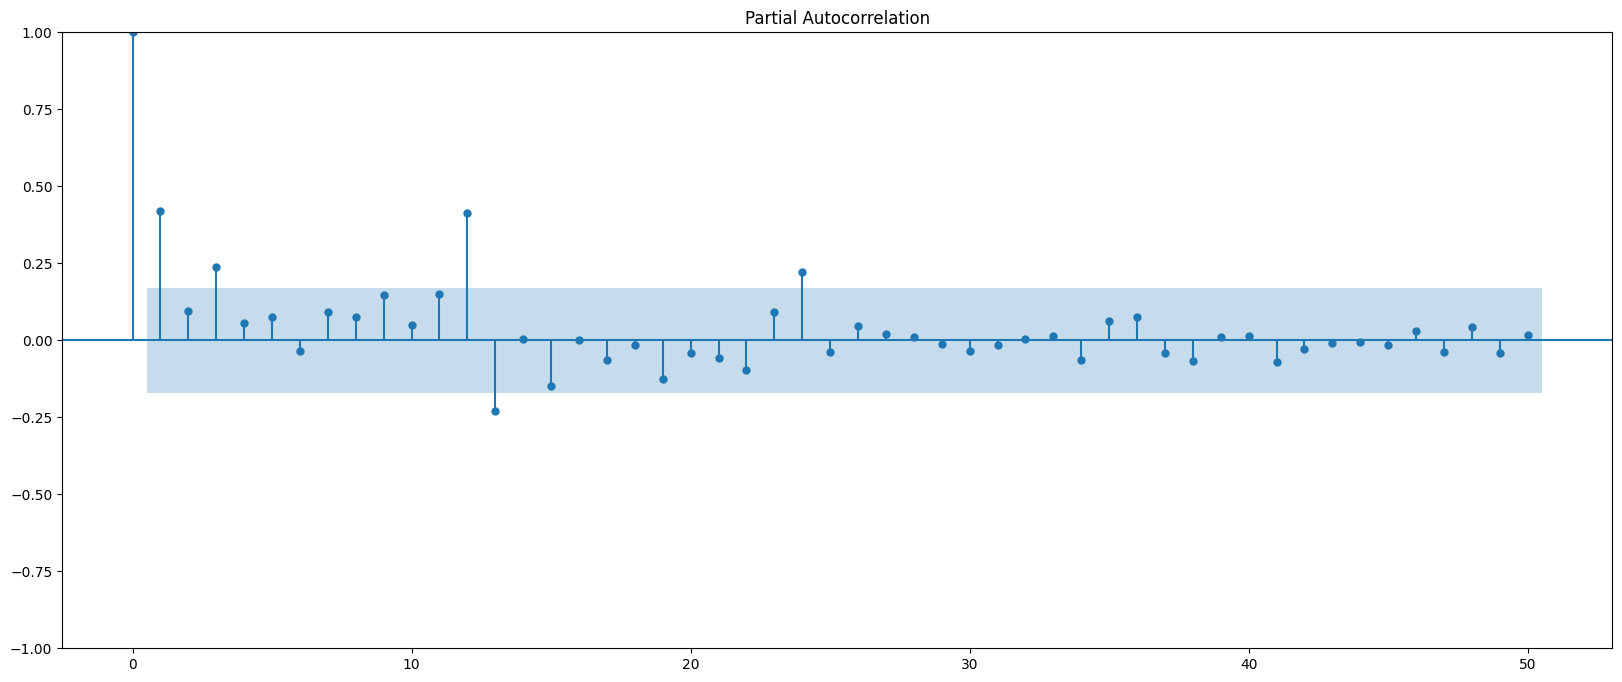

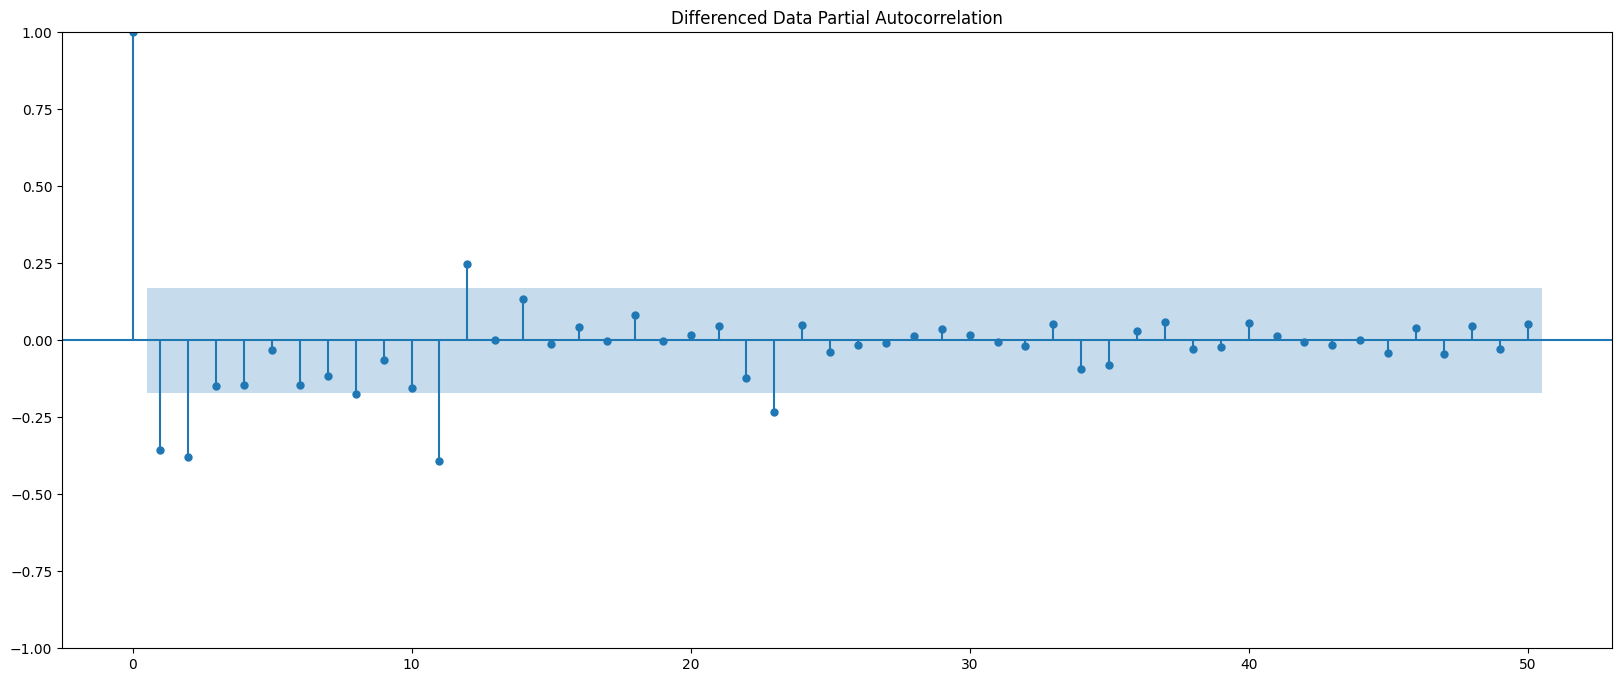

In [ ]:
plot_pacf(train['Rose'],lags=50)
plot_pacf(train['Rose'].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation')
plt.show()

In [ ]:
manual_ARIMA = ARIMA(train['Rose'], order=(2,1,2))

results_manual_ARIMA = manual_ARIMA.fit()

print(results_manual_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:                   Rose   No. Observations:                  132
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -635.935
Date:                Sat, 24 Feb 2024   AIC                           1281.871
Time:                        19:02:57   BIC                           1296.247
Sample:                    01-01-1980   HQIC                          1287.712
                         - 12-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4540      0.469     -0.969      0.333      -1.372       0.464
ar.L2          0.0001      0.170      0.001      0.999      -0.334       0.334
ma.L1         -0.2541      0.459     -0.554      0.5

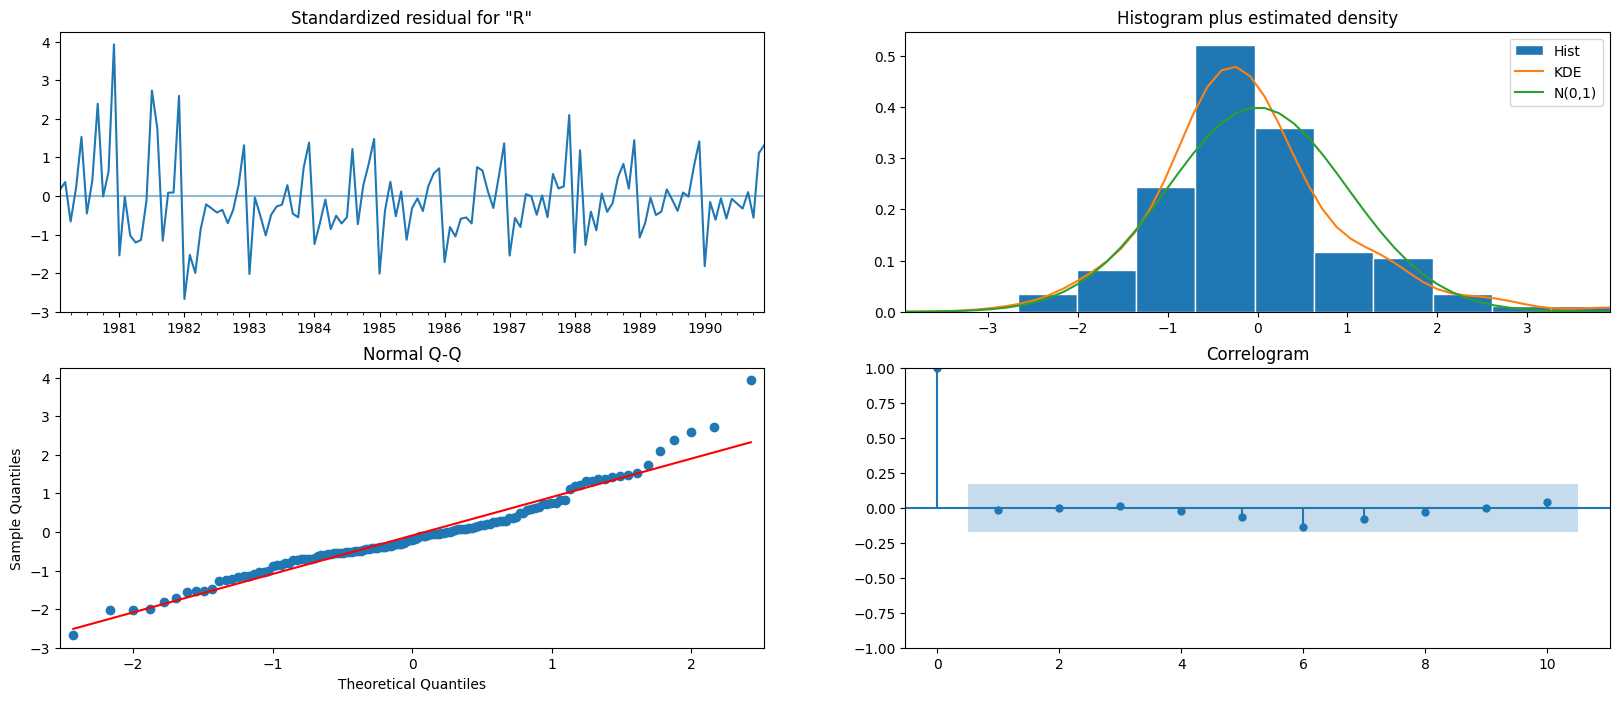

In [ ]:
results_manual_ARIMA.plot_diagnostics();

In [ ]:
predicted_manual_ARIMA = results_manual_ARIMA.forecast(steps=len(test))
rmse = mean_squared_error(test['Rose'],predicted_manual_ARIMA,squared=False)
print('RMSE:',rmse)

RMSE: 36.87119661282404


In [ ]:
temp_resultsDf = pd.DataFrame({'Test RMSE': rmse}
                           ,index=['ARIMA(3,1,3)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

Test RMSE
Linear Regression                                   15.268955
NaiveModel                                          79.718773
SimpleAverageModel                                  53.460570
2pointTrailingMovingAverage                         11.529278
4pointTrailingMovingAverage                         14.451403
6pointTrailingMovingAverage                         14.566327
9pointTrailingMovingAverage                         14.727630
Alpha=0.1,SimpleExponentialSmoothing                36.828033
Alpha Value = 0.1, beta value = 0.1, DoubleExpo...  36.923416
Alpha=0.08621,Beta=1.3722,Gamma=0.4763,TrippleE...  37.592212
Alpha=0.2,Beta=0.7,Gamma=0.2,TripleExponentialS...   8.702460
Auto_ARIMA                                          36.815186
(3,1,1),(3,0,2,12),Auto_SARIMA                      18.882146
ARIMA(3,1,3)                                        36.871197

 Manual SARIMA

In [ ]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [ ]:
import statsmodels.api as sm

manual_SARIMA = sm.tsa.statespace.SARIMAX(train['Rose'].values,
                                order=(2, 1, 2),
                                seasonal_order=(2, 1, 2, 12),
                                enforc1e_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA = manual_SARIMA.fit(maxiter=1000)
print(results_manual_SARIMA.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(2, 1, 2)x(2, 1, 2, 12)   Log Likelihood                -538.016
Date:                            Sat, 24 Feb 2024   AIC                           1094.031
Time:                                    19:04:35   BIC                           1119.044
Sample:                                         0   HQIC                          1104.188
                                            - 132                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5491      0.228     -2.408      0.016      -0.996      -0.102
ar.L2         -0.0744      0.099   

In [ ]:
SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_manual_SARIMA.aic},
                               ignore_index=True)
SARIMA_AIC

param       seasonal          AIC
0  (3, 1, 3)  (3, 0, 3, 12)  1094.031391

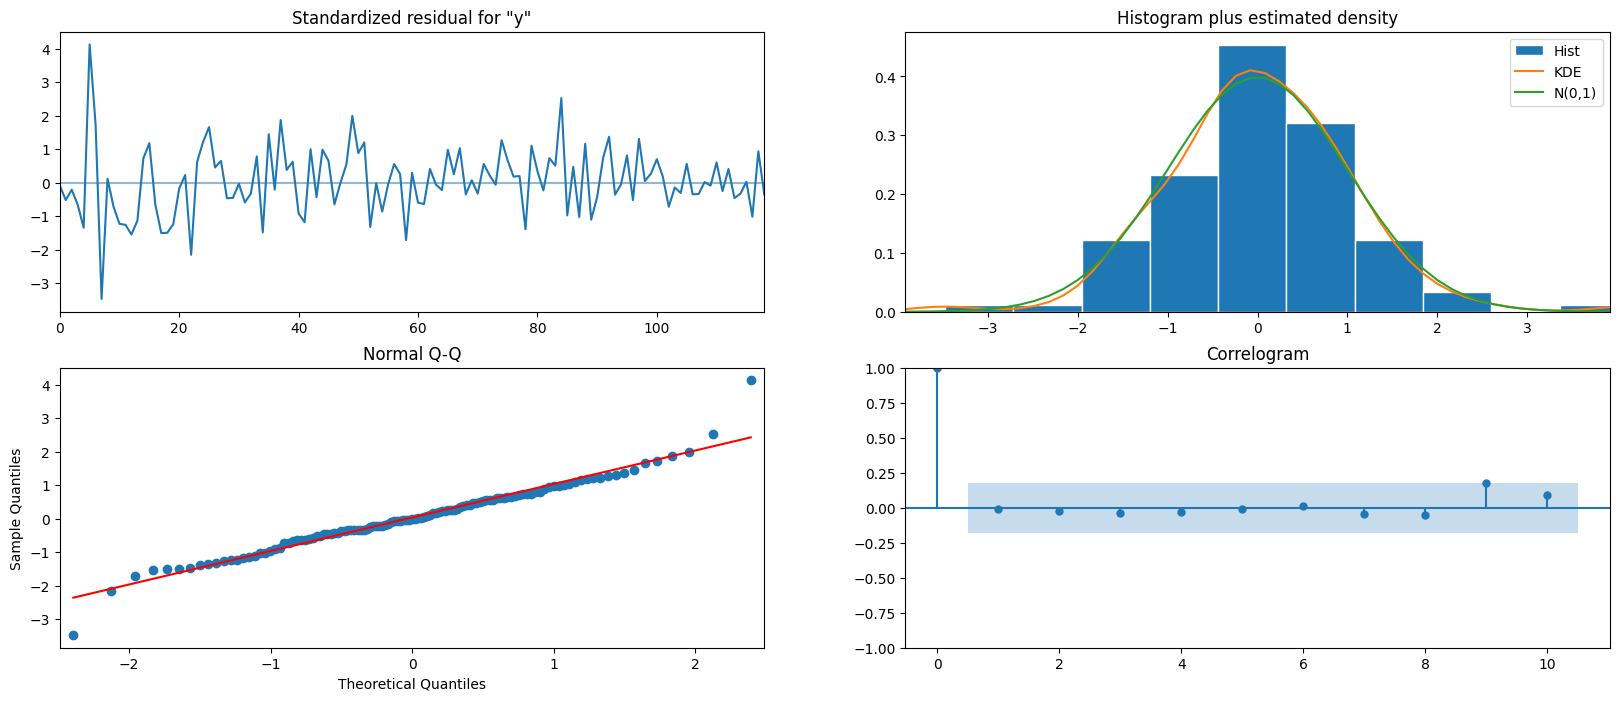

In [ ]:
results_manual_SARIMA.plot_diagnostics()
plt.show()

In [ ]:
predicted_manual_SARIMA_6 = results_manual_SARIMA.get_forecast(steps=len(test))
predicted_manual_SARIMA_6.summary_frame(alpha=0.05).head()

y       mean    mean_se  mean_ci_lower  mean_ci_upper
0  38.859008  21.079974      -2.456983      80.174998
1  65.275466  21.893683      22.364635     108.186297
2  60.204460  21.939663      17.203510     103.205410
3  59.294918  22.254024      15.677833     102.912003
4  60.592880  22.300319      16.885057     104.300703

In [ ]:
rmse_manual_sarima = mean_squared_error(test['Rose'],predicted_manual_SARIMA_6.predicted_mean,squared=False)
print(rmse_manual_sarima)

15.168791268595278


In [ ]:
resultsDf_10_1 = pd.DataFrame({'Test RMSE': rmse_manual_sarima}
                           ,index=['(2,1,2)(2,1,2,12),Manual_SARIMA'])

resultsDf = pd.concat([resultsDf, resultsDf_10_1])
resultsDf

Test RMSE
Linear Regression                                   15.268955
NaiveModel                                          79.718773
SimpleAverageModel                                  53.460570
2pointTrailingMovingAverage                         11.529278
4pointTrailingMovingAverage                         14.451403
6pointTrailingMovingAverage                         14.566327
9pointTrailingMovingAverage                         14.727630
Alpha=0.1,SimpleExponentialSmoothing                36.828033
Alpha Value = 0.1, beta value = 0.1, DoubleExpo...  36.923416
Alpha=0.08621,Beta=1.3722,Gamma=0.4763,TrippleE...  37.592212
Alpha=0.2,Beta=0.7,Gamma=0.2,TripleExponentialS...   8.702460
Auto_ARIMA                                          36.815186
(3,1,1),(3,0,2,12),Auto_SARIMA                      18.882146
ARIMA(3,1,3)                                        36.871197
(2,1,2)(2,1,2,12),Manual_SARIMA                     15.168791

1.8 Build a table (create a data frame) with all the models built along with their corresponding parameters and the respective RMSE values on the test data.

In [ ]:
resultsDf.sort_values(by=['Test RMSE'])


Test RMSE
Alpha=0.2,Beta=0.7,Gamma=0.2,TripleExponentialS...   8.702460
2pointTrailingMovingAverage                         11.529278
4pointTrailingMovingAverage                         14.451403
6pointTrailingMovingAverage                         14.566327
9pointTrailingMovingAverage                         14.727630
(2,1,2)(2,1,2,12),Manual_SARIMA                     15.168791
Linear Regression                                   15.268955
(3,1,1),(3,0,2,12),Auto_SARIMA                      18.882146
Auto_ARIMA                                          36.815186
Alpha=0.1,SimpleExponentialSmoothing                36.828033
ARIMA(3,1,3)                                        36.871197
Alpha Value = 0.1, beta value = 0.1, DoubleExpo...  36.923416
Alpha=0.08621,Beta=1.3722,Gamma=0.4763,TrippleE...  37.592212
SimpleAverageModel                                  53.460570
NaiveModel                                          79.718773

1.9 Based on the model-building exercise, build the most optimum model(s) on the complete data and predict 12 months into the future with appropriate confidence intervals/bands.

In [ ]:
date = pd.date_range(start='8/1/1995', end='7/1/1996', freq='MS')
date

DatetimeIndex(['1995-08-01', '1995-09-01', '1995-10-01', '1995-11-01',
               '1995-12-01', '1996-01-01', '1996-02-01', '1996-03-01',
               '1996-04-01', '1996-05-01', '1996-06-01', '1996-07-01'],
              dtype='datetime64[ns]', freq='MS')

In [ ]:
future_predictions=pd.DataFrame(columns=['Rose_Sale_Prediction'],index=date)

In [ ]:
TES_train = df.copy()

In [ ]:
model_TES_tm_sm = ExponentialSmoothing(TES_train['Rose'],trend='multiplicative',seasonal='multiplicative')
alpha=0.2
beta=0.8
gamma=0.2
model_TES = model_TES_tm_sm.fit(smoothing_level=alpha,smoothing_slope=beta,smoothing_seasonal=gamma,
                                optimized=False,use_brute=True)
prediction=model_TES.forecast(steps=12)

In [ ]:
future_predictions['Rose_Sale_Prediction']=prediction
future_predictions

Rose_Sale_Prediction
1995-08-01             37.915551
1995-09-01             38.575089
1995-10-01             40.066433
1995-11-01             47.417515
1995-12-01             67.106532
1996-01-01             26.260601
1996-02-01             33.743810
1996-03-01             40.102270
1996-04-01             42.188188
1996-05-01             36.003167
1996-06-01             41.266405
1996-07-01             43.913350

In [ ]:
pred_df = pd.DataFrame({'lower_CI':prediction - 1.96*np.std(model_TES.resid,ddof=1),
                          'prediction':prediction,
                          'upper_ci': prediction + 1.96*np.std(model_TES.resid,ddof=1)})
pred_df.head()

lower_CI  prediction    upper_ci
1995-08-01  -4.396776   37.915551   80.227877
1995-09-01  -3.737237   38.575089   80.887415
1995-10-01  -2.245893   40.066433   82.378759
1995-11-01   5.105189   47.417515   89.729841
1995-12-01  24.794205   67.106532  109.418858

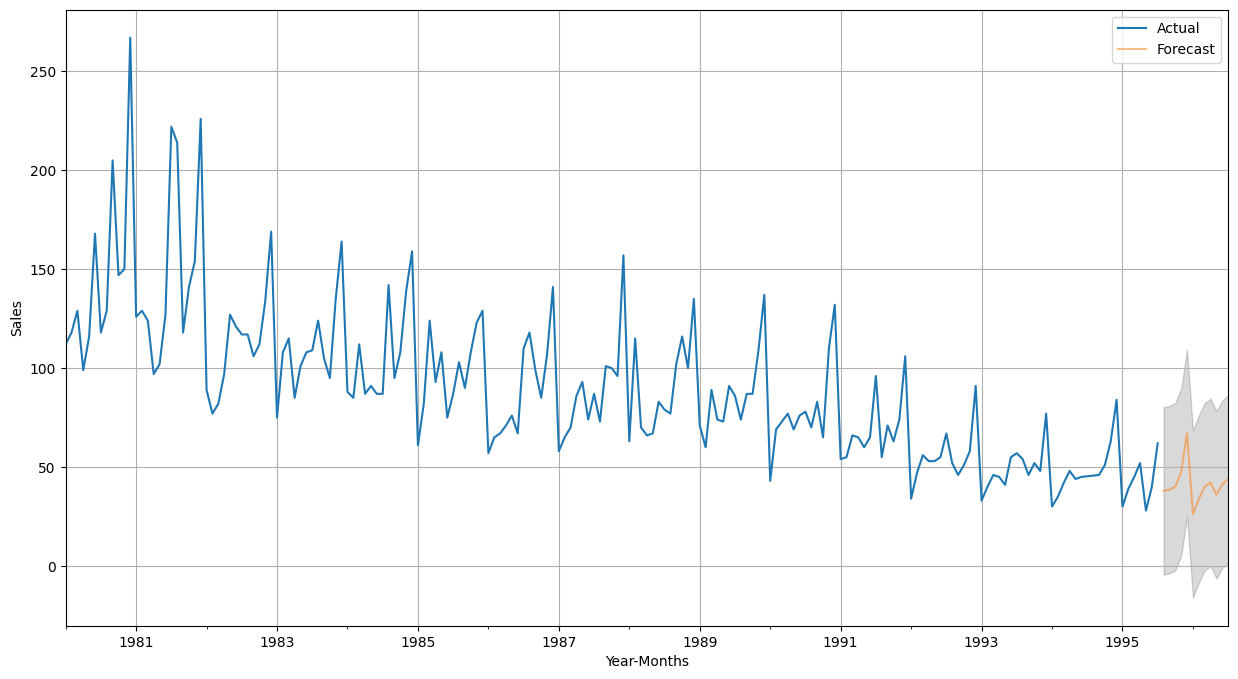

In [ ]:
axis = df['Rose'].plot(label='Actual', figsize=(15,8))
pred_df['prediction'].plot(ax=axis, label='Forecast', alpha=0.5)
axis.fill_between(pred_df.index, pred_df['lower_CI'], pred_df['upper_ci'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('Sales')
plt.legend(loc='best')
plt.grid()
plt.show()